<a href="https://colab.research.google.com/github/Arjun9465005/Classification_with_an_Academic_Success/blob/main/Classification_with_an_Academic_Success_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [ ]:
# !pip install flaml

In [ ]:
# pip install autogluon

In [ ]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.0 MB/s eta 0:00:00


## Important Dependencies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import f_oneway, f
from scipy.stats import chi2_contingency, chi2
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif





In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/playground-series-s4e6/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/playground-series-s4e6/test.csv")

#df_test.head()
df_train.head()

id  Marital status  Application mode  Application order  Course  \
0   0               1                 1                  1    9238   
1   1               1                17                  1    9238   
2   2               1                17                  2    9254   
3   3               1                 1                  3    9500   
4   4               1                 1                  2    9500   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
0                           126.0            1                       1  ...   
1                           125.0            1                      19  ...   
2                           137.0            1                       3  ...   
3                           131.0            1                      19  ...   
4                           132.0            1                      19  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    6   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    8   
4                                    0                                    7   

   Curricular units 2nd sem (evaluations)  \
0                                       7   
1                                       9   
2                                       0   
3                                      11   
4                                      12   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    6                         12.428571   
1                                    0                          0.000000   
2                                    0                          0.000000   
3                                    7                         12.820000   
4                                    6                         12.933333   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               11.1   
1                                               0               11.1   
2                                               0               16.2   
3                                               0               11.1   
4                                               0                7.6   

   Inflation rate   GDP    Target  
0             0.6  2.02  Graduate  
1             0.6  2.02   Dropout  
2             0.3 -0.92   Dropout  
3             0.6  2.02  Enrolled  
4             2.6  0.32  Graduate  

[5 rows x 38 columns]

In [ ]:
df_train.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

In [ ]:
df_train.describe()

id  Marital status  Application mode  Application order  \
count  76518.000000    76518.000000      76518.000000       76518.000000   
mean   38258.500000        1.111934         16.054419           1.644410   
std    22088.988286        0.441669         16.682337           1.229645   
min        0.000000        1.000000          1.000000           0.000000   
25%    19129.250000        1.000000          1.000000           1.000000   
50%    38258.500000        1.000000         17.000000           1.000000   
75%    57387.750000        1.000000         39.000000           2.000000   
max    76517.000000        6.000000         53.000000           9.000000   

             Course  Daytime/evening attendance  Previous qualification  \
count  76518.000000                76518.000000            76518.000000   
mean    9001.286377                    0.915314                3.658760   
std     1803.438531                    0.278416                8.623774   
min       33.000000                    0.000000                1.000000   
25%     9119.000000                    1.000000                1.000000   
50%     9254.000000                    1.000000                1.000000   
75%     9670.000000                    1.000000                1.000000   
max     9991.000000                    1.000000               43.000000   

       Previous qualification (grade)   Nacionality  Mother's qualification  \
count                    76518.000000  76518.000000            76518.000000   
mean                       132.378766      1.226600               19.837633   
std                         10.995328      3.392183               15.399456   
min                         95.000000      1.000000                1.000000   
25%                        125.000000      1.000000                1.000000   
50%                        133.100000      1.000000               19.000000   
75%                        140.000000      1.000000               37.000000   
max                        190.000000    109.000000               44.000000   

       ...  Curricular units 1st sem (without evaluations)  \
count  ...                                     76518.00000   
mean   ...                                         0.05796   
std    ...                                         0.40849   
min    ...                                         0.00000   
25%    ...                                         0.00000   
50%    ...                                         0.00000   
75%    ...                                         0.00000   
max    ...                                        12.00000   

       Curricular units 2nd sem (credited)  \
count                         76518.000000   
mean                              0.137053   
std                               0.933830   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              19.000000   

       Curricular units 2nd sem (enrolled)  \
count                         76518.000000   
mean                              5.933414   
std                               1.627182   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               6.000000   
max                              23.000000   

       Curricular units 2nd sem (evaluations)  \
count                            76518.000000   
mean                                 7.234468   
std                                  3.503040   
min                                  0.000000   
25%                                  6.000000   
50%                                  7.000000   
75%                                  9.000000   
max                                 33.000000   

       Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
count                         765

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [ ]:
df_train.isnull().sum()


id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

## Drop the educational special need and international columnns

In [ ]:
df_train.drop(columns=['Educational special needs', 'International'], axis=1)
df_train

id  Marital status  Application mode  Application order  Course  \
0          0               1                 1                  1    9238   
1          1               1                17                  1    9238   
2          2               1                17                  2    9254   
3          3               1                 1                  3    9500   
4          4               1                 1                  2    9500   
...      ...             ...               ...                ...     ...   
76513  76513               1                17                  1    9254   
76514  76514               1                 1                  6    9254   
76515  76515               5                17                  1    9085   
76516  76516               1                 1                  3    9070   
76517  76517               1                 1                  1    9773   

       Daytime/evening attendance  Previous qualification  \
0                               1                       1   
1                               1                       1   
2                               1                       1   
3                               1                       1   
4                               1                       1   
...                           ...                     ...   
76513                           1                       1   
76514                           1                       1   
76515                           1                       1   
76516                           1                       1   
76517                           1                       1   

       Previous qualification (grade)  Nacionality  Mother's qualification  \
0                               126.0            1                       1   
1                               125.0            1                      19   
2                               137.0            1                       3   
3                               131.0            1                      19   
4                               132.0            1                      19   
...                               ...          ...                     ...   
76513                           121.0            1                      19   
76514                           125.0            1                       1   
76515                           138.0            1                      37   
76516                           136.0            1                      38   
76517                           133.1            1                      19   

       ...  Curricular units 2nd sem (credited)  \
0      ...                                    0   
1      ...                                    0   
2      ...                                    0   
3      ...                                    0   
4      ...                                    0   
...    ...                                  ...   
76513  ...                                    0   
76514  ...                                    0   
76515  ...                                    0   
76516  ...                                    0   
76517  ...                                    0   

       Curricular units 2nd sem (enrolled)  \
0                                        6   
1                                        6   
2                                        6   
3                                        8   
4                                        7   
...                                    ...   
76513                                    6   
76514                                    6   
76515                                    5   
76516                                    6   
76517                                    6   

       Curricular units 2nd sem (evaluations)  \
0                                           7   
1                                           9   
2                                           0   
3                                          11   
4   

In [ ]:
df_test.drop(columns=['Educational special needs', 'International'], axis=1)
df_test

id  Marital status  Application mode  Application order  Course  \
0       76518               1                 1                  1    9500   
1       76519               1                 1                  1    9238   
2       76520               1                 1                  1    9238   
3       76521               1                44                  1    9147   
4       76522               1                39                  1    9670   
...       ...             ...               ...                ...     ...   
51007  127525               1                 1                  2     171   
51008  127526               2                39                  1    9119   
51009  127527               1                 1                  1     171   
51010  127528               1                 1                  3    9773   
51011  127529               1                 1                  1     171   

       Daytime/evening attendance  Previous qualification  \
0                               1                       1   
1                               1                       1   
2                               1                       1   
3                               1                      39   
4                               1                       1   
...                           ...                     ...   
51007                           1                       1   
51008                           1                      19   
51009                           1                       1   
51010                           1                       1   
51011                           1                       1   

       Previous qualification (grade)  Nacionality  Mother's qualification  \
0                               141.0            1                       3   
1                               128.0            1                       1   
2                               118.0            1                       1   
3                               130.0            1                       1   
4                               110.0            1                       1   
...                               ...          ...                     ...   
51007                           128.0            1                      38   
51008                           133.1            1                      19   
51009                           127.0            1                       1   
51010                           132.0            1                      19   
51011                           129.0            1                      37   

       ...  Curricular units 1st sem (without evaluations)  \
0      ...                                               0   
1      ...                                               0   
2      ...                                               0   
3      ...                                               0   
4      ...                                               0   
...    ...                                             ...   
51007  ...                                               0   
51008  ...                                               0   
51009  ...                                               0   
51010  ...                                               0   
51011  ...                                               0   

       Curricular units 2nd sem (credited)  \
0                                        0   
1                                        0   
2                                        0   
3                                        3   
4                                        0   
...                                    ...   
51007                                    0   
51008                                    0   
51009                                    0   
51010                                    0   
51011                                    0   

       Curricular units 2nd sem (enrolled)  \
0                                        8   
1             

## Seprating the Categorical, Integer and Float data for the dataset

In [ ]:
categorical_cols = ['Marital status', 'Application mode', 'Application order', 'Course','Daytime/evening attendance','Previous qualification','Nacionality',"Mother's qualification","Father's qualification","Mother's occupation",
                    "Father's occupation",'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender','Scholarship holder']
integer_cols = ['Age at enrollment', ' Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)'
                ,' Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)']
float_cols = ['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', ' GDP']

## Plotting Bar charts of the categorical Data


Counts for Marital status:
Marital status
1    70189
2     5296
4      866
5      116
6       35
3       16
Name: count, dtype: int64

Counts for Application mode:
Application mode
1     35227
17    16523
39    14519
44     3012
43     2671
7      1498
18     1256
42      551
51      442
16      265
53      225
15      183
5        87
10       43
2         8
27        2
12        1
26        1
4         1
35        1
9         1
3         1
Name: count, dtype: int64

Counts for Application order:
Application order
1    54381
2     8875
3     5364
4     3822
5     2125
6     1947
0        3
9        1
Name: count, dtype: int64

Counts for Course:
Course
9500    12074
9773     8214
9238     7935
9147     7741
9254     5425
9085     5373
9670     4760
9991     4057
9003     3733
9070     3281
9853     3198
9119     3004
171      2859
8014     2438
9130     1606
9556      746
33         72
979         1
39          1
Name: count, dtype: int64

Counts for Daytime/evening attendance:
Daytim

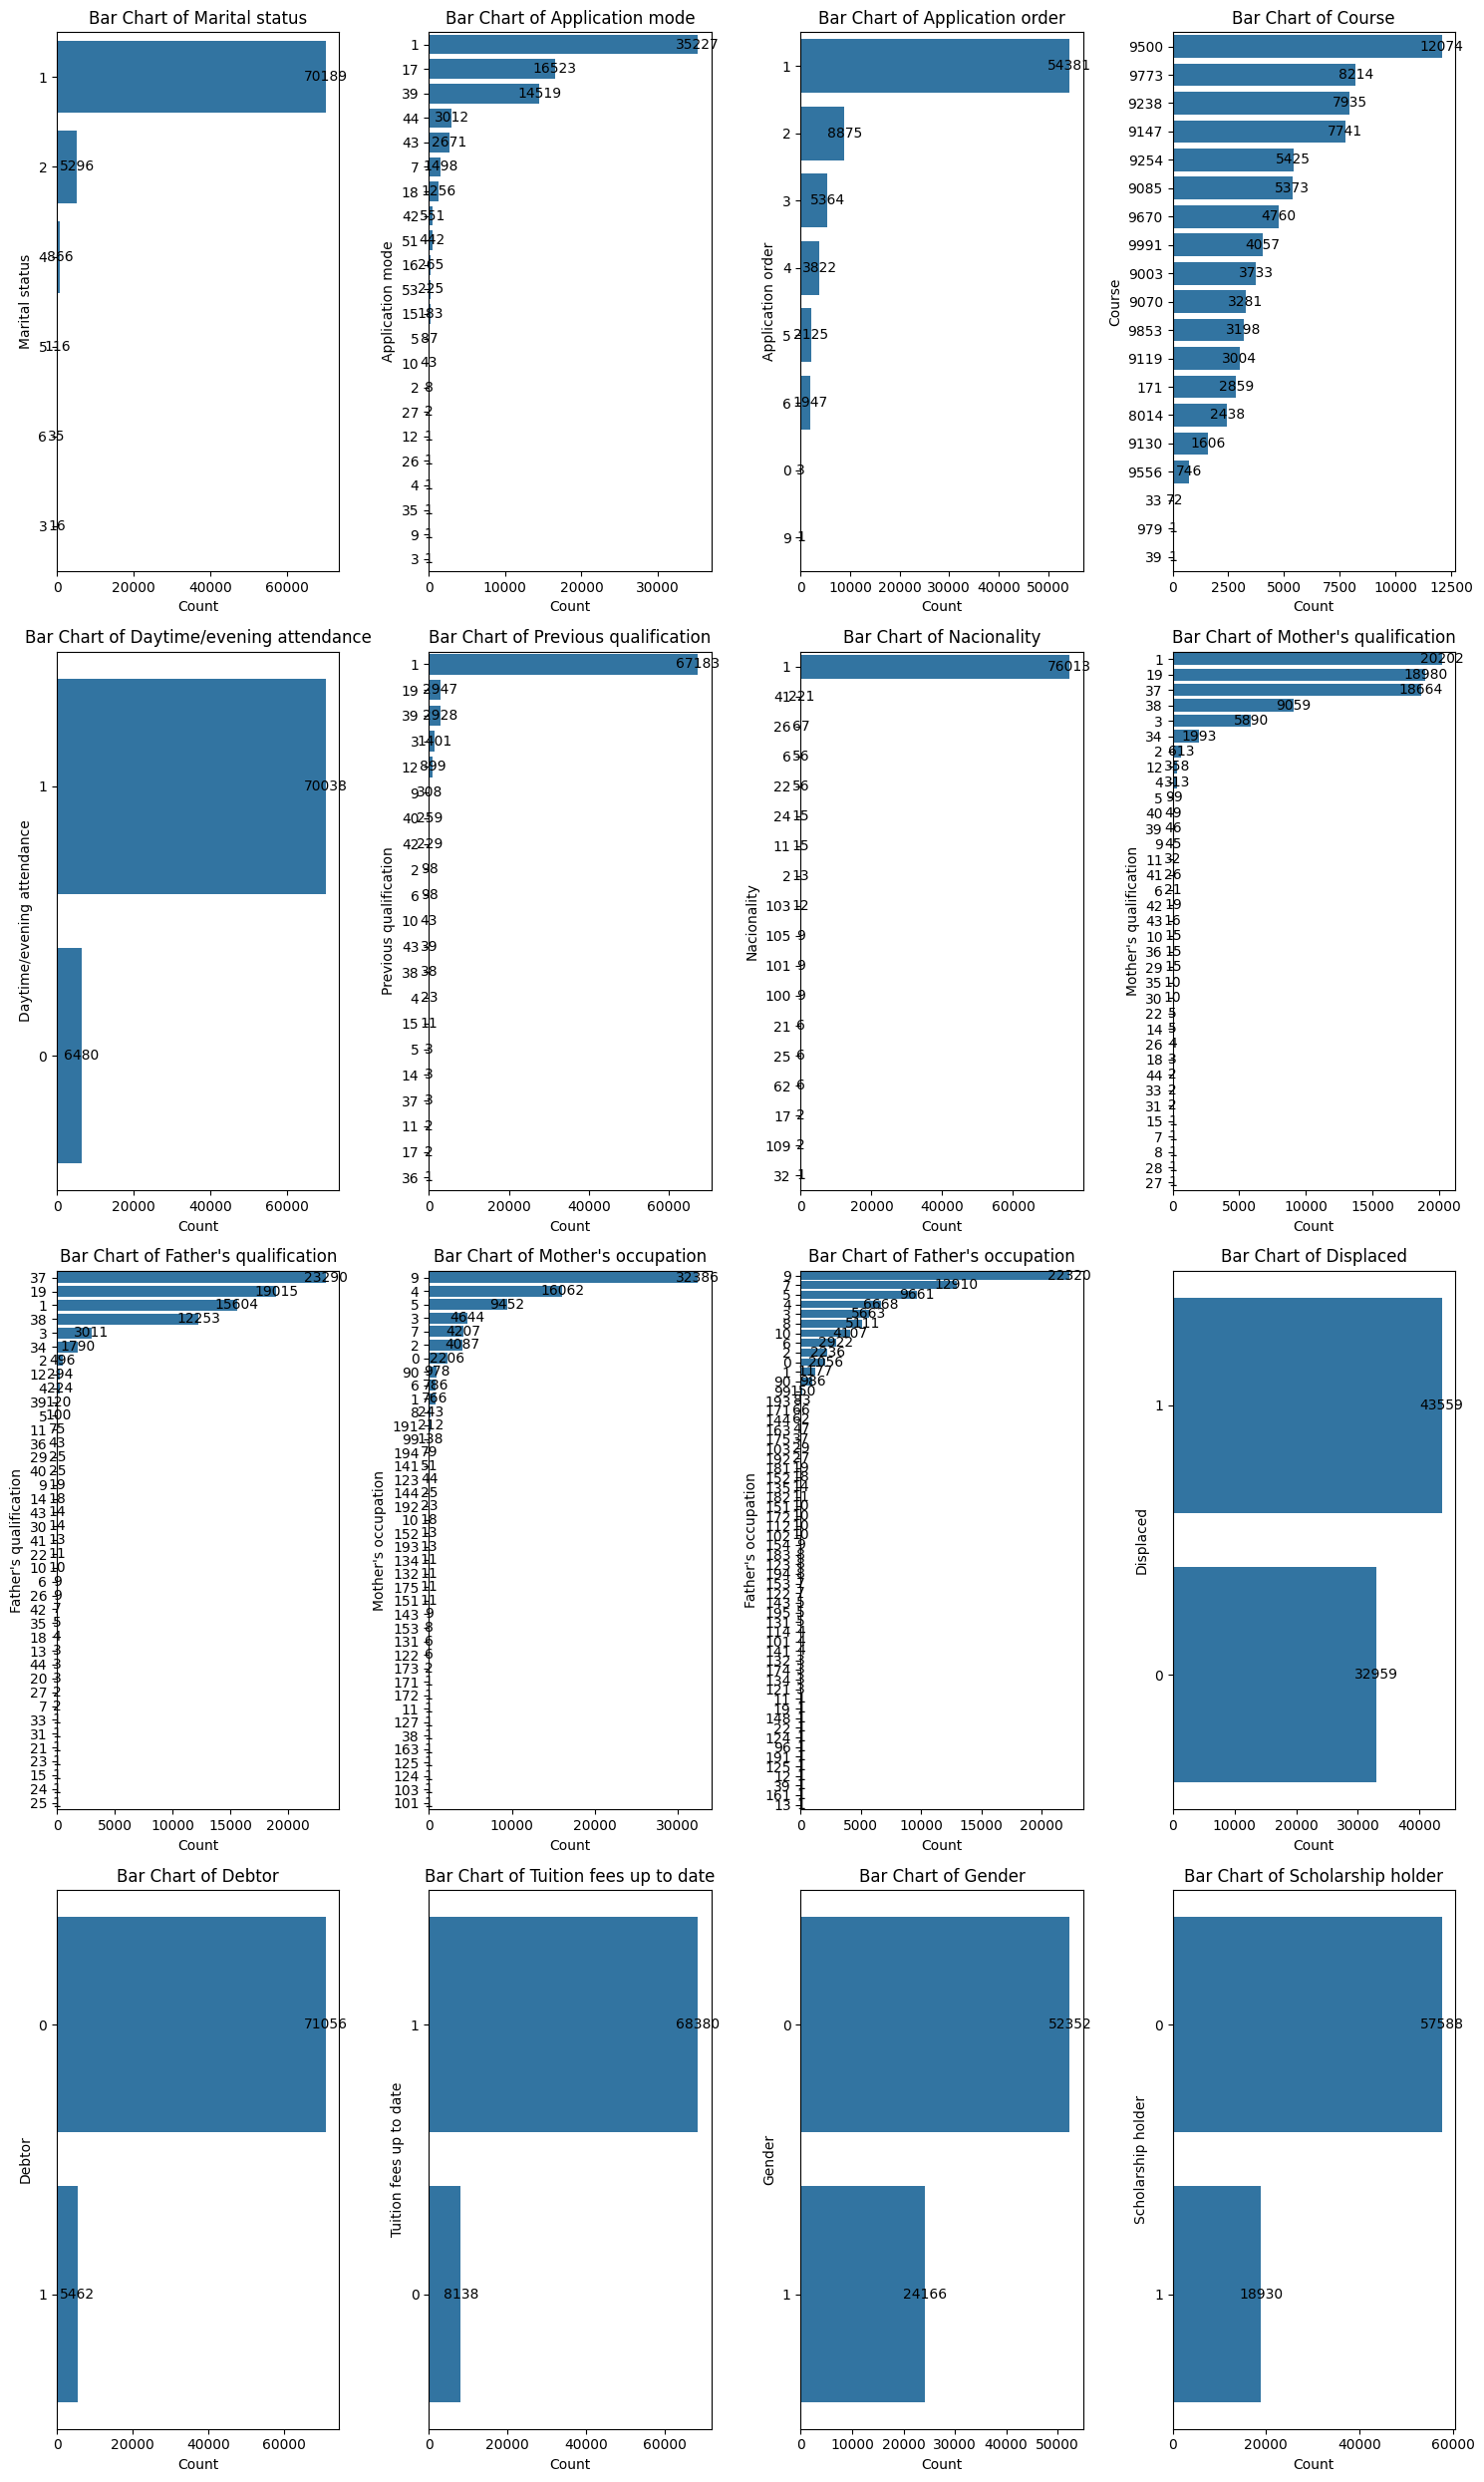

In [ ]:

df = pd.DataFrame(df_train)

categorical_cols = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder']

# Plotting bar charts for each categorical column and printing counts
plt.figure(figsize=(15, 25))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 4, i)  # Adjust the number of rows and columns as needed
    ax = sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Bar Chart of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

    # Print counts
    counts = df[col].value_counts()
    print(f'\nCounts for {col}:')
    print(counts)

    # Add count labels to each bar
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.3, p.get_y() + p.get_height() / 2, f'{int(width)}', ha='center', va='center')

plt.tight_layout()
plt.show()

## Plotting Box plot for the Integer Data

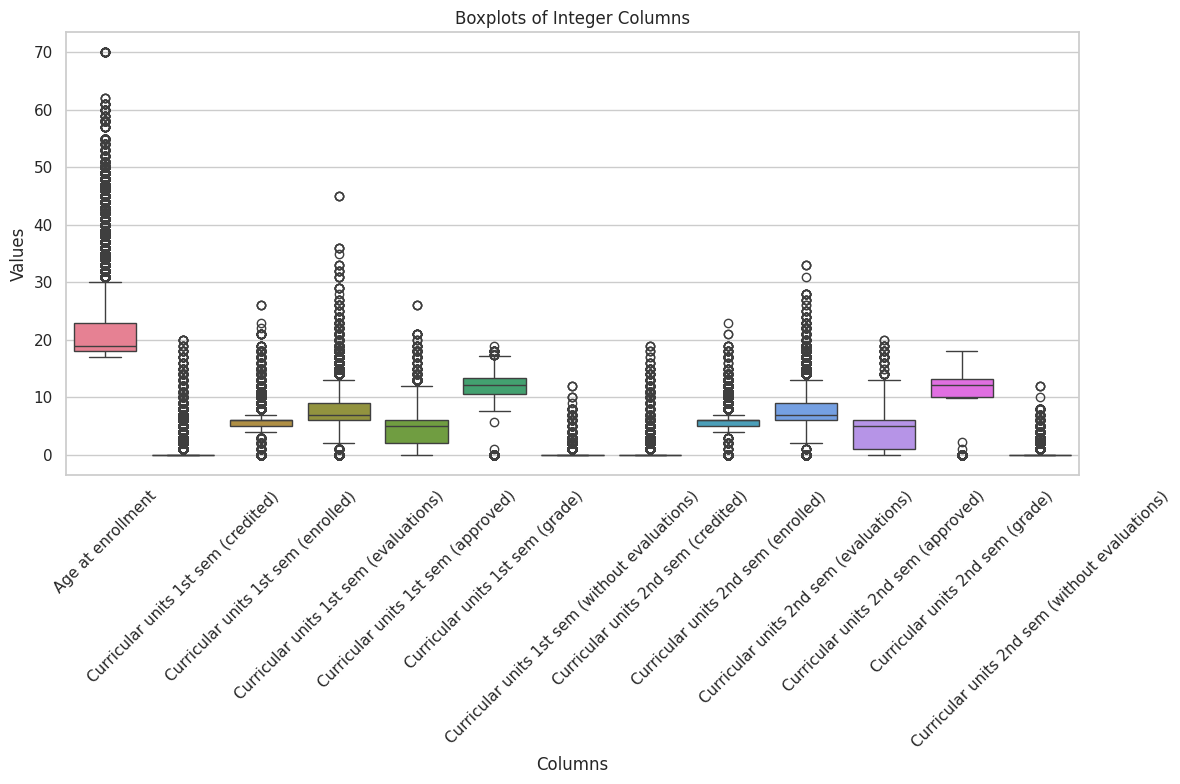

In [ ]:
#Ploting the box plot of the integer data
df = pd.DataFrame(df_train)

integer_cols = ['Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
                'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
                'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
                'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',
                'Curricular units 2nd sem (without evaluations)']

# Plotting boxplots for each integer column
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.boxplot(data=df[integer_cols])
plt.title('Boxplots of Integer Columns')
plt.xticks(rotation=45)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

## Plotting Histogram for the Integer Data with the graph to chechk its Distribution

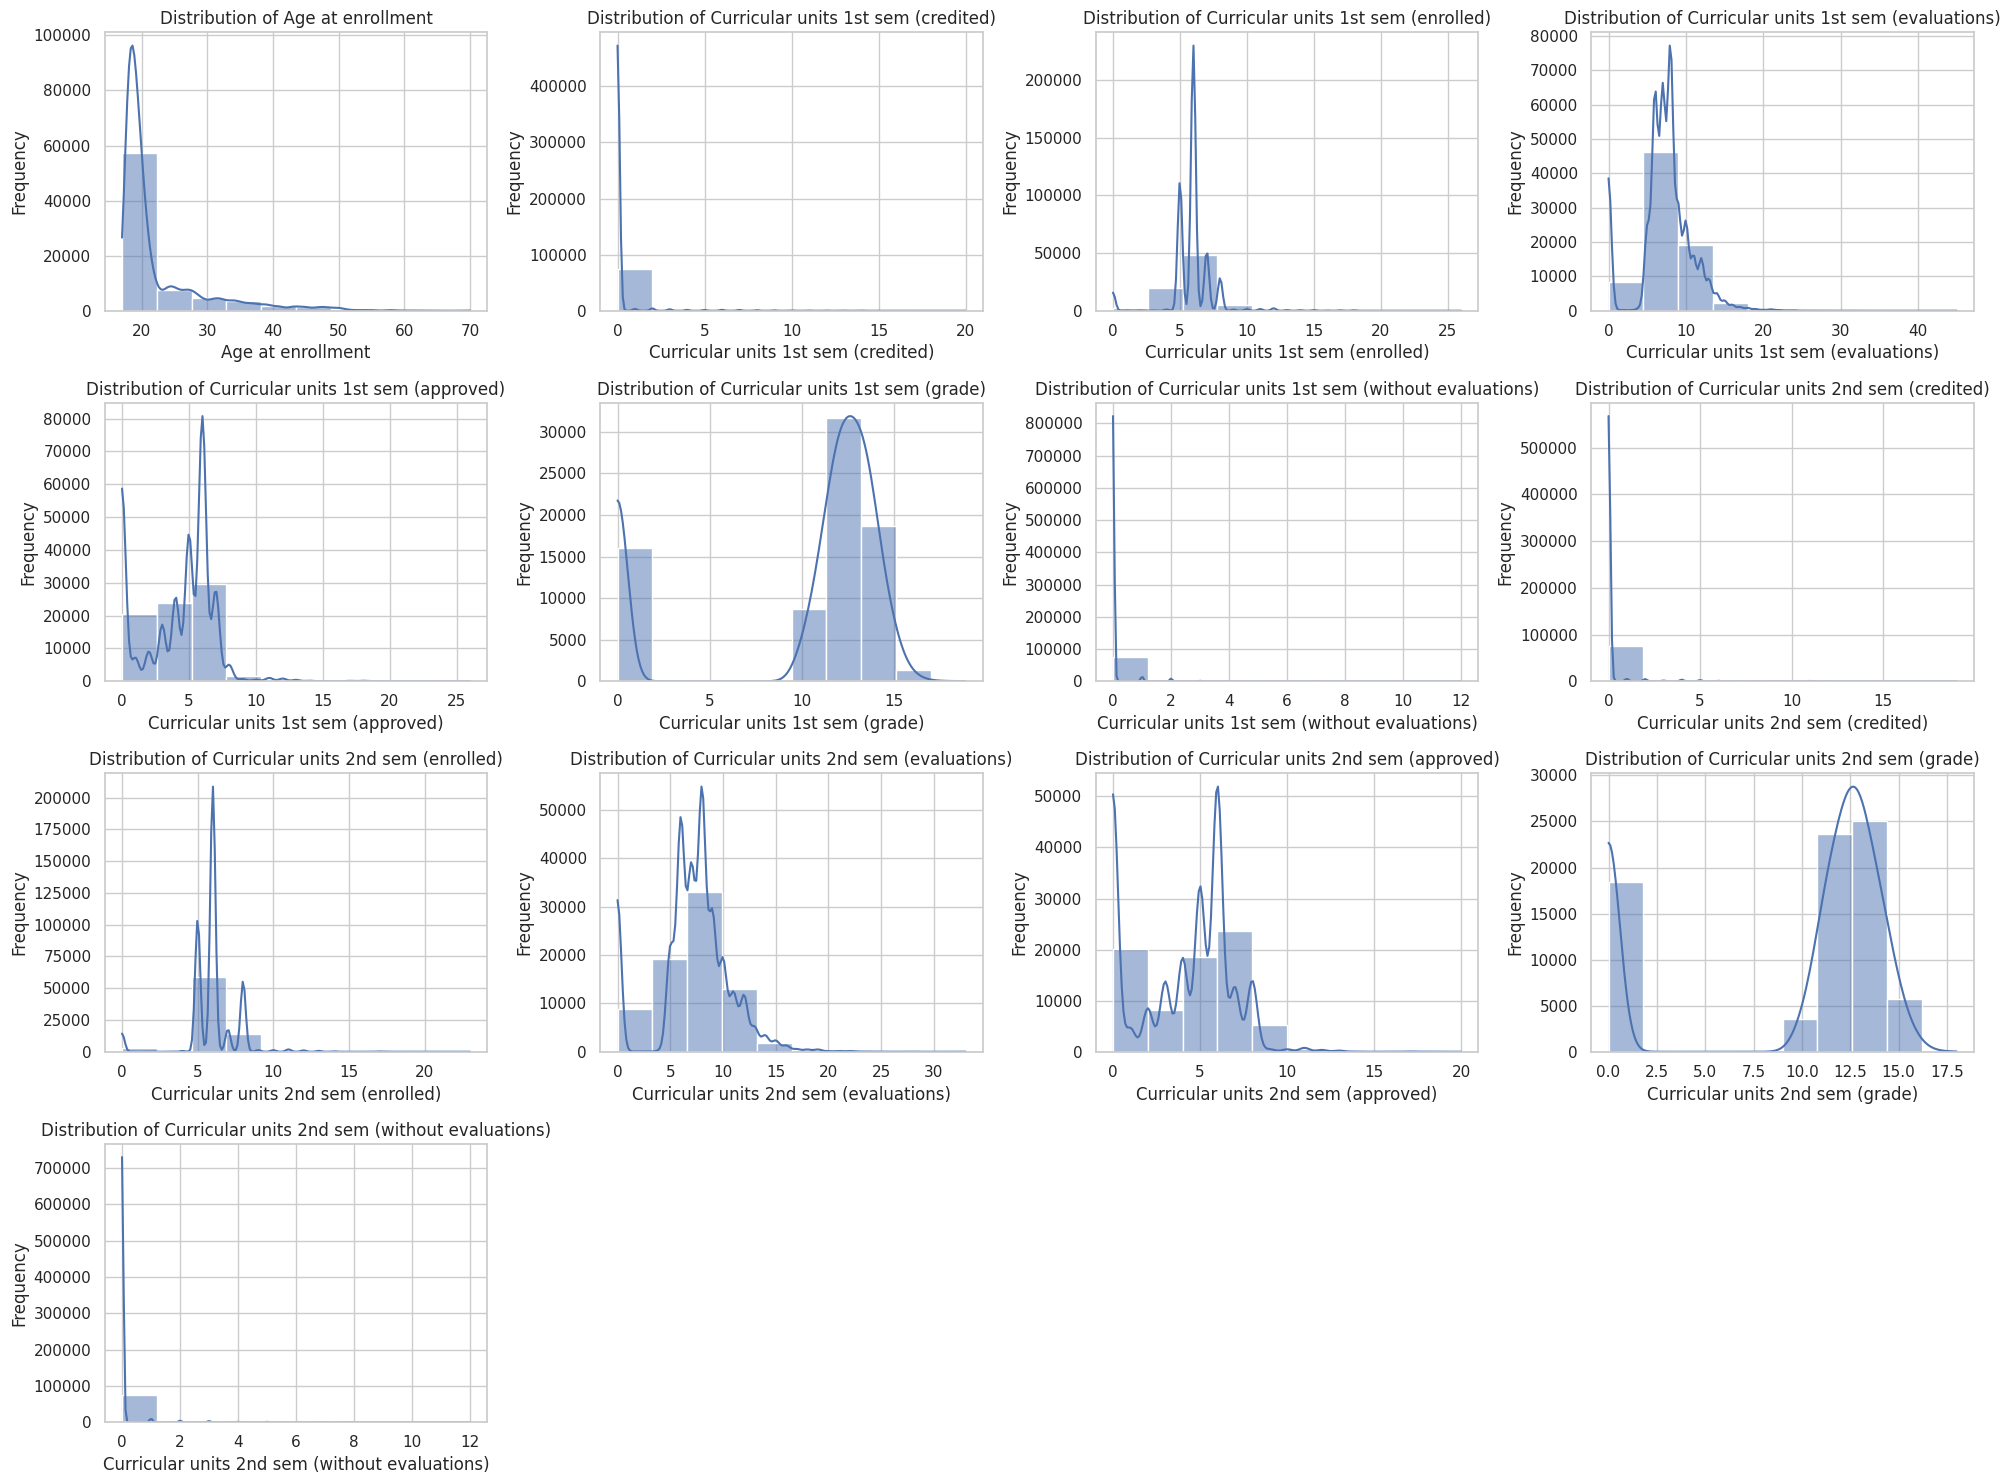

In [ ]:
#ploting the distribution for chechking that outlier infulence my data or not
df = pd.DataFrame(df_train)

integer_cols = ['Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
                'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
                'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
                'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',
                'Curricular units 2nd sem (without evaluations)']

# Plotting histograms for each integer column
plt.figure(figsize=(20, 15))

for i, col in enumerate(integer_cols, 1):
    plt.subplot(4, 4, i)  # Adjust the number of rows and columns as needed
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Plotting Histogram for the Integer Data with the graph to chechk its Distribution

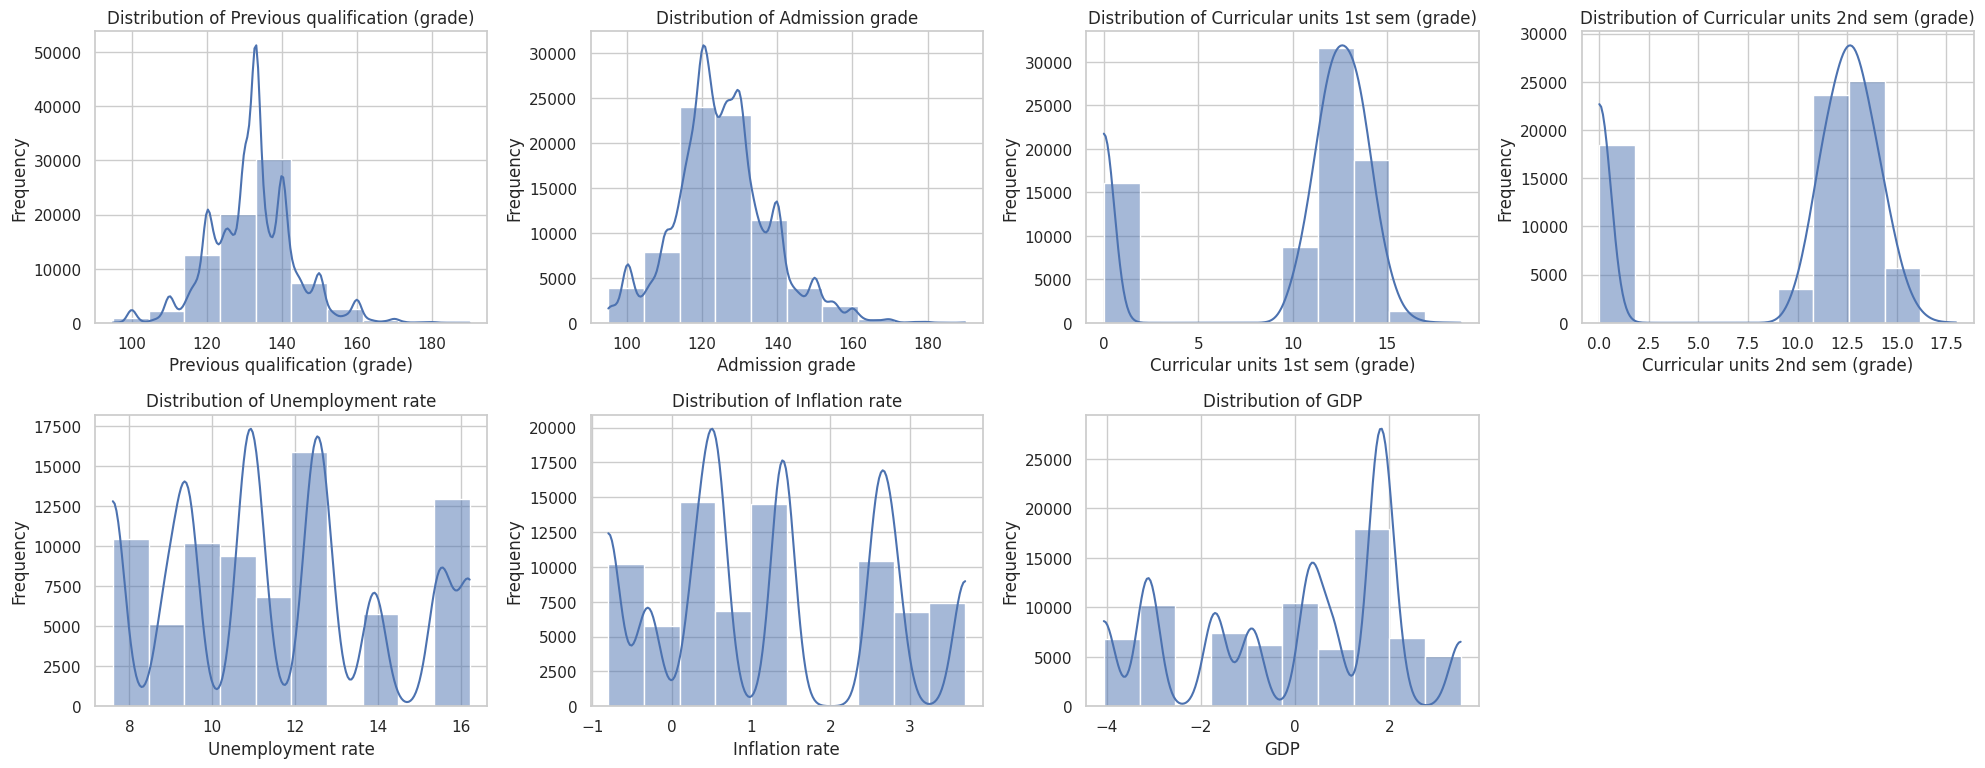

In [ ]:
#ploting the distribution for chechking that outlier infulence my data or not
df = pd.DataFrame(df_train)

float_cols = ['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP']

# Plotting histograms for each integer column
plt.figure(figsize=(20, 15))

for i, col in enumerate(float_cols, 1):
    plt.subplot(4, 4, i)  # Adjust the number of rows and columns as needed
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

F-Test for the float data

In [ ]:


# Select float columns
float_cols = ['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)','Unemployment rate','Inflation rate', 'GDP']

# Example: Perform F-test on each float column against a target variable
# Assuming 'Target' is the column you want to compare against (e.g., different groups)
target_col = 'Target'

# Ensure the target variable is categorical
df_train[target_col] = df_train[target_col].astype('category')

# Significance level for the critical value
alpha = 0.05

# Perform the F-test for each float column
f_test_results = {}
for col in float_cols:
    groups = [df_train[df_train[target_col] == group][col].dropna() for group in df_train[target_col].unique()]
    f_stat, p_value = f_oneway(*groups)

    # Degrees of freedom
    df_between = len(groups) - 1
    df_within = sum(len(group) for group in groups) - len(groups)

    # Critical value
    critical_value = f.ppf(1 - alpha, df_between, df_within)

    f_test_results[col] = {'F-statistic': f_stat, 'p-value': p_value, 'critical value': critical_value}

# Display the F-test results
for col, result in f_test_results.items():
    print(f"Column: {col}")
    print(f"  F-statistic: {result['F-statistic']}")
    print(f"  p-value: {result['p-value']}")
    print(f"  Critical value: {result['critical value']}\n")


Column: Previous qualification (grade)
  F-statistic: 1024.8689910421017
  p-value: 0.0
  Critical value: 2.995849566261223

Column: Admission grade
  F-statistic: 1305.2842399119272
  p-value: 0.0
  Critical value: 2.995849566261223

Column: Curricular units 1st sem (grade)
  F-statistic: 34578.96699025098
  p-value: 0.0
  Critical value: 2.995849566261223

Column: Curricular units 2nd sem (grade)
  F-statistic: 49461.25651416838
  p-value: 0.0
  Critical value: 2.995849566261223

Column: Unemployment rate
  F-statistic: 142.71454662436307
  p-value: 1.3651412119580873e-62
  Critical value: 2.995849566261223

Column: Inflation rate
  F-statistic: 57.24523829706375
  p-value: 1.436449986160818e-25
  Critical value: 2.995849566261223

Column: GDP
  F-statistic: 438.63516148871474
  p-value: 3.863215984938129e-190
  Critical value: 2.995849566261223



Chi-square for categorical data

In [ ]:


categorical_cols = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification","Mother's occupation", "Father's occupation", 'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder']

# Example: Perform Chi-Square test on each categorical column against a target variable
# Assuming 'Target' is the column you want to compare against (e.g., different groups)
target_col = 'Target'

# Ensure the target variable is categorical
df_train[target_col] = df_train[target_col].astype('category')

# Perform the Chi-Square test for each categorical column
chi_square_results = {}
alpha = 0.05
for col in categorical_cols:
    contingency_table = pd.crosstab(df_train[col], df_train[target_col])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    critical_value = chi2.ppf(1 - alpha, dof)
    chi_square_results[col] = {
        'Chi2': chi2_stat,
        'p-value': p_value,
        'degrees of freedom': dof,
        'critical value': critical_value,
        'expected frequencies': expected
    }

# Display the Chi-Square test results
for col, result in chi_square_results.items():
    print(f"Column: {col}")
    print(f"  Chi2: {result['Chi2']}")
    print(f"  p-value: {result['p-value']}")
    print(f"  Degrees of Freedom: {result['degrees of freedom']}")
    print(f"  Critical Value: {result['critical value']}")
    print(f"  Expected Frequencies: \n{result['expected frequencies']}\n")


Column: Marital status
  Chi2: 1728.622672523396
  p-value: 0.0
  Degrees of Freedom: 10
  Critical Value: 18.307038053275146
  Expected Frequencies: 
[[2.32037030e+04 1.37042743e+04 3.32810227e+04]
 [1.75079871e+03 1.03403434e+03 2.51116694e+03]
 [5.28942210e+00 3.12397083e+00 7.58660707e+00]
 [2.86289971e+02 1.69084921e+02 4.10625108e+02]
 [3.83483102e+01 2.26487885e+01 5.50029013e+01]
 [1.15706108e+01 6.83368619e+00 1.65957030e+01]]

Column: Application mode
  Chi2: 13093.956508996738
  p-value: 0.0
  Degrees of Freedom: 42
  Critical Value: 58.12403768086803
  Expected Frequencies: 
[[1.16456545e+04 6.87800753e+03 1.67033380e+04]
 [2.64471105e+00 1.56198542e+00 3.79330354e+00]
 [3.30588881e-01 1.95248177e-01 4.74162942e-01]
 [3.30588881e-01 1.95248177e-01 4.74162942e-01]
 [2.87612327e+01 1.69865914e+01 4.12521760e+01]
 [4.95222144e+02 2.92481769e+02 7.10296087e+02]
 [3.30588881e-01 1.95248177e-01 4.74162942e-01]
 [1.42153219e+01 8.39567161e+00 2.03890065e+01]
 [3.30588881e-01 1.952

# Data Transformation

In [ ]:
df_train

id  Marital status  Application mode  Application order  Course  \
0          0               1                 1                  1    9238   
1          1               1                17                  1    9238   
2          2               1                17                  2    9254   
3          3               1                 1                  3    9500   
4          4               1                 1                  2    9500   
...      ...             ...               ...                ...     ...   
76513  76513               1                17                  1    9254   
76514  76514               1                 1                  6    9254   
76515  76515               5                17                  1    9085   
76516  76516               1                 1                  3    9070   
76517  76517               1                 1                  1    9773   

       Daytime/evening attendance  Previous qualification  \
0                               1                       1   
1                               1                       1   
2                               1                       1   
3                               1                       1   
4                               1                       1   
...                           ...                     ...   
76513                           1                       1   
76514                           1                       1   
76515                           1                       1   
76516                           1                       1   
76517                           1                       1   

       Previous qualification (grade)  Nacionality  Mother's qualification  \
0                               126.0            1                       1   
1                               125.0            1                      19   
2                               137.0            1                       3   
3                               131.0            1                      19   
4                               132.0            1                      19   
...                               ...          ...                     ...   
76513                           121.0            1                      19   
76514                           125.0            1                       1   
76515                           138.0            1                      37   
76516                           136.0            1                      38   
76517                           133.1            1                      19   

       ...  Curricular units 2nd sem (credited)  \
0      ...                                    0   
1      ...                                    0   
2      ...                                    0   
3      ...                                    0   
4      ...                                    0   
...    ...                                  ...   
76513  ...                                    0   
76514  ...                                    0   
76515  ...                                    0   
76516  ...                                    0   
76517  ...                                    0   

       Curricular units 2nd sem (enrolled)  \
0                                        6   
1                                        6   
2                                        6   
3                                        8   
4                                        7   
...                                    ...   
76513                                    6   
76514                                    6   
76515                                    5   
76516                                    6   
76517                                    6   

       Curricular units 2nd sem (evaluations)  \
0                                           7   
1                                           9   
2                                           0   
3                                          11   
4   

In [ ]:
integer_cols
float_cols
categorical_cols

['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Displaced',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder']

<ipython-input-21-61b0fbad5c6e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_train, palette='viridis')


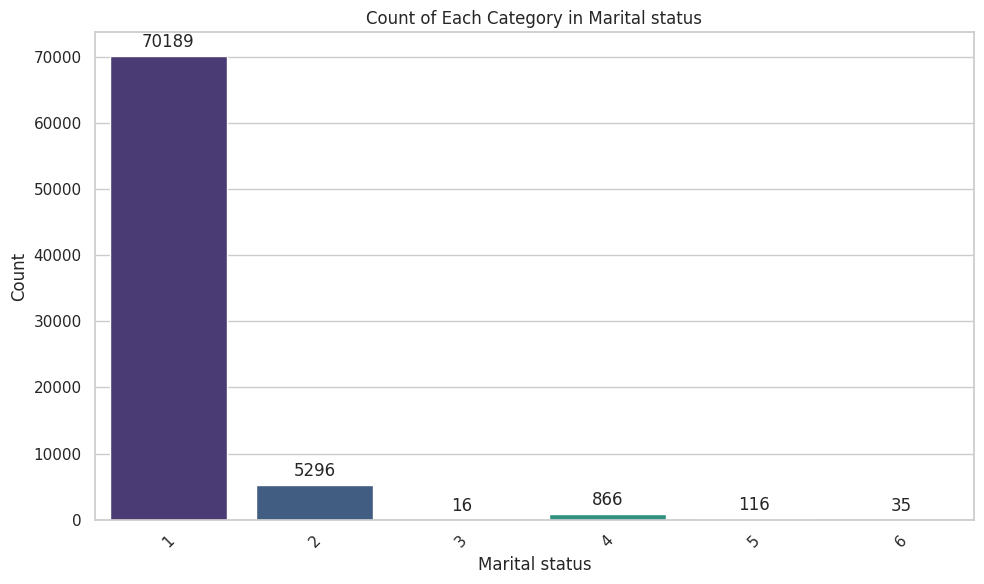

<ipython-input-21-61b0fbad5c6e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_train, palette='viridis')


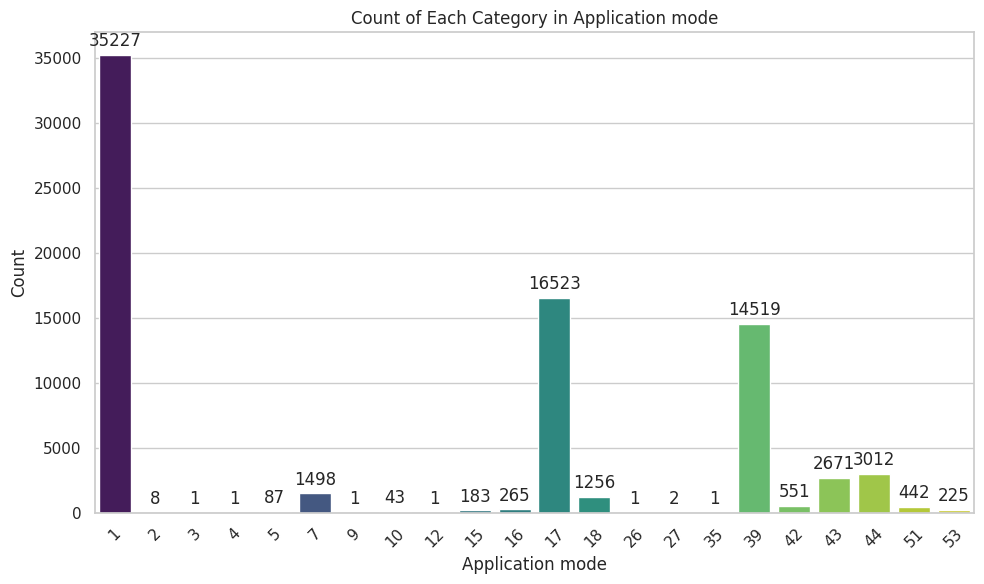

<ipython-input-21-61b0fbad5c6e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_train, palette='viridis')


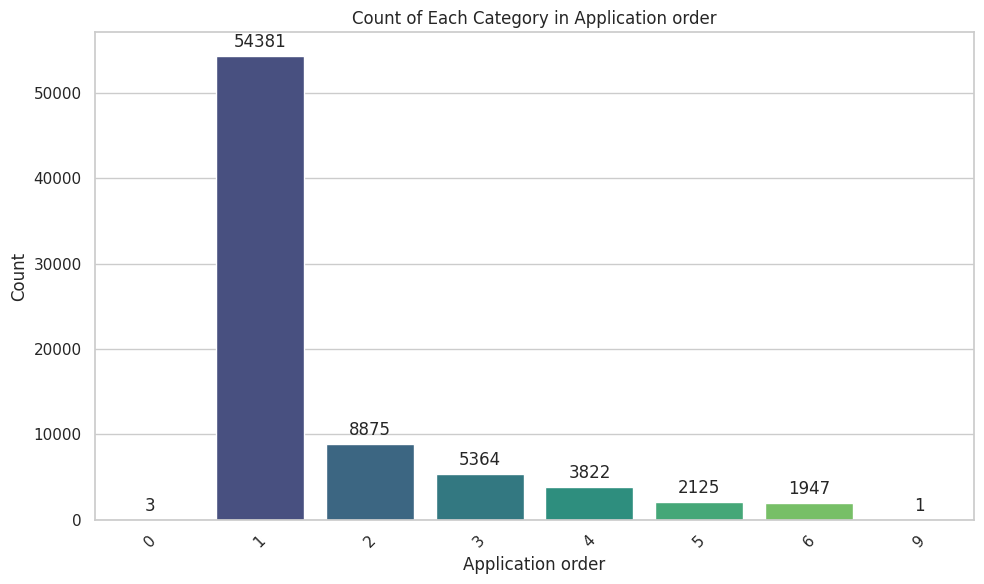

<ipython-input-21-61b0fbad5c6e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_train, palette='viridis')


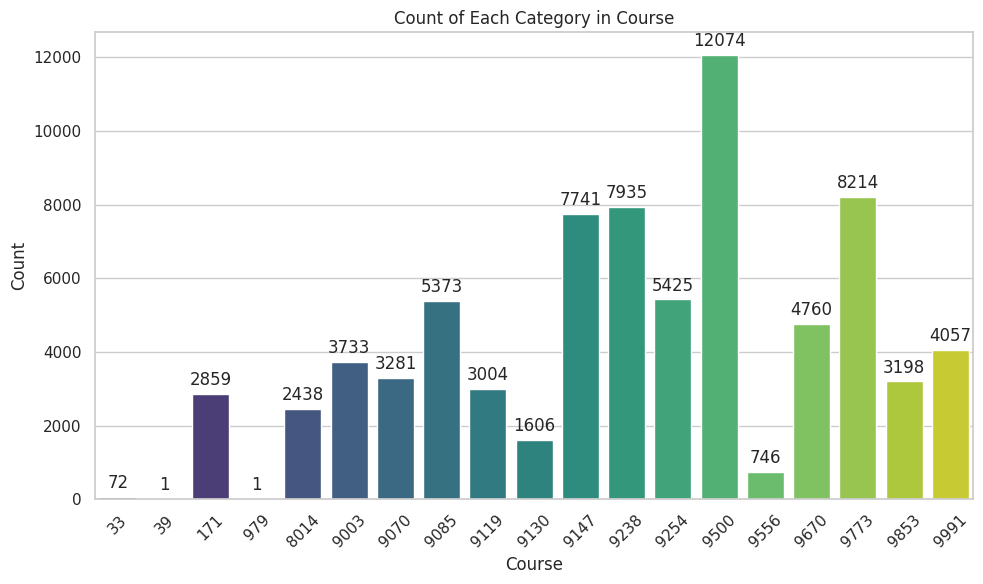

<ipython-input-21-61b0fbad5c6e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_train, palette='viridis')


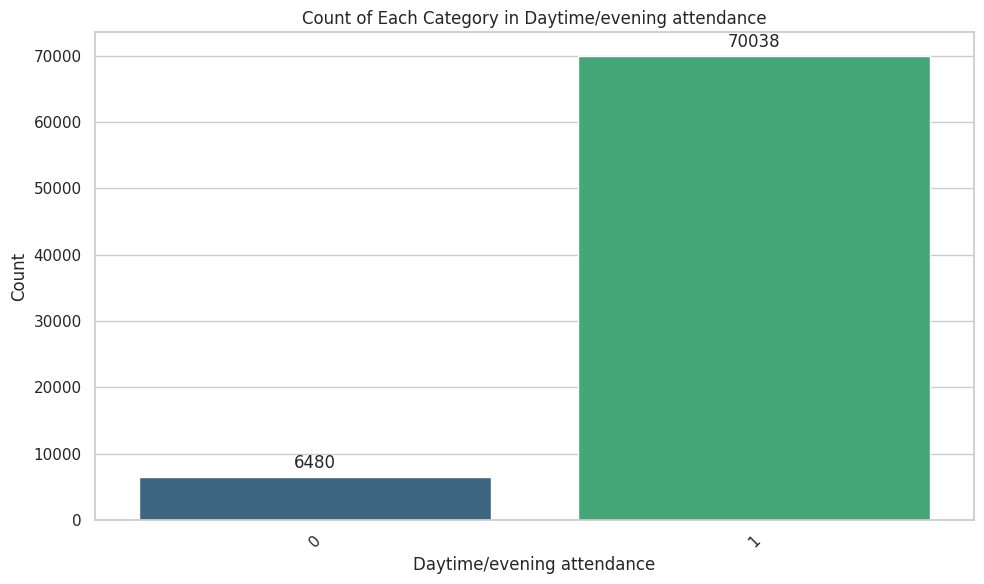

<ipython-input-21-61b0fbad5c6e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_train, palette='viridis')


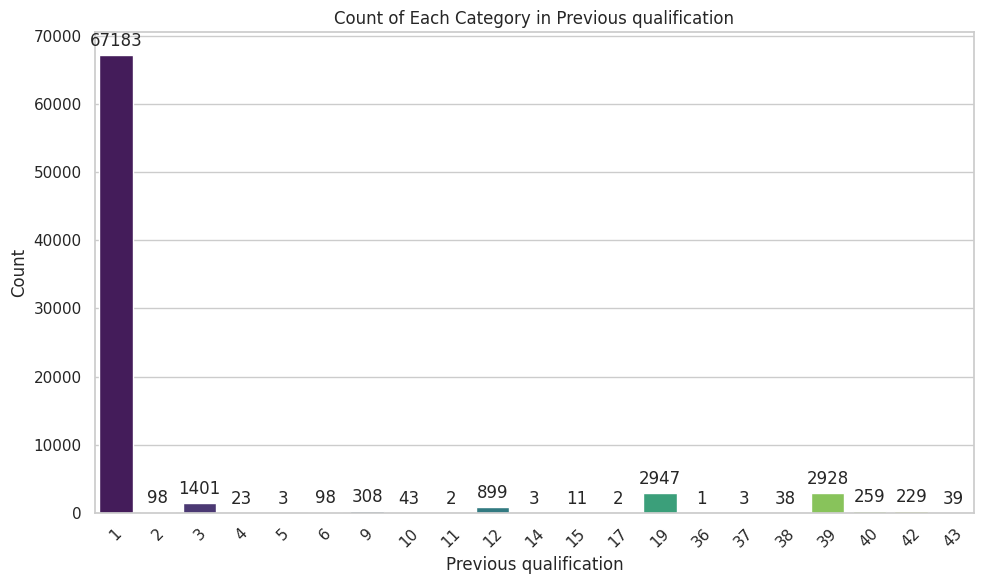

<ipython-input-21-61b0fbad5c6e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_train, palette='viridis')


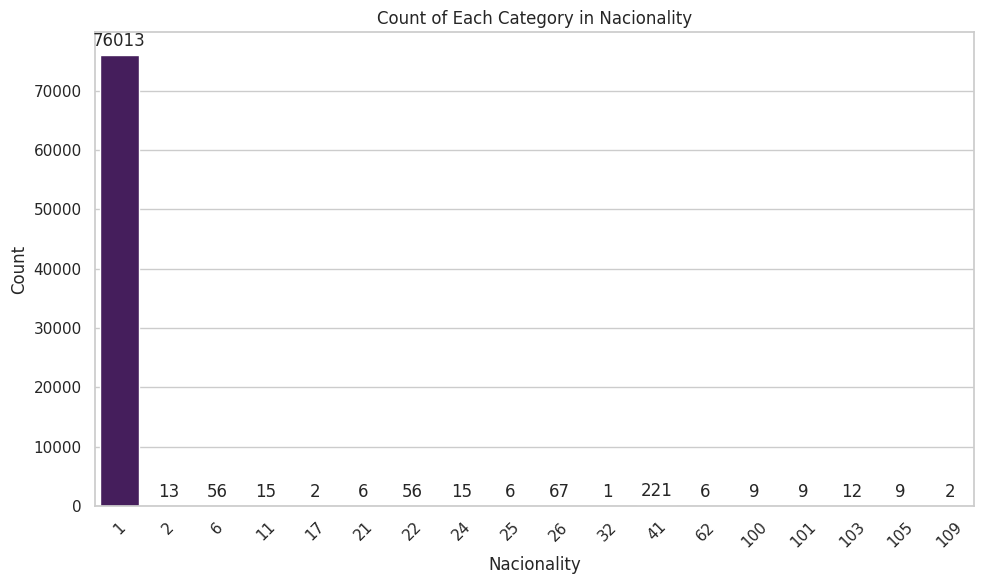

<ipython-input-21-61b0fbad5c6e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_train, palette='viridis')


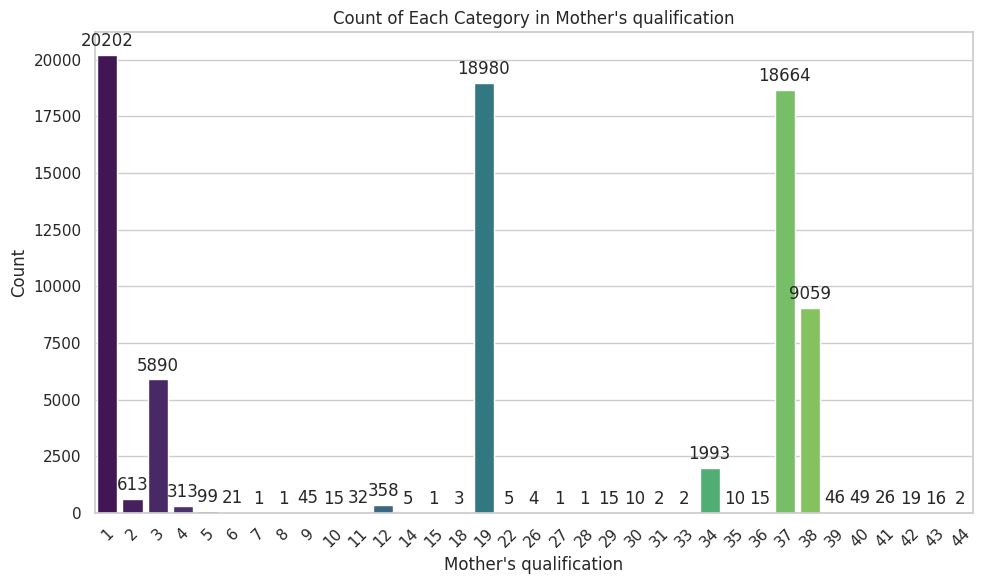

<ipython-input-21-61b0fbad5c6e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_train, palette='viridis')


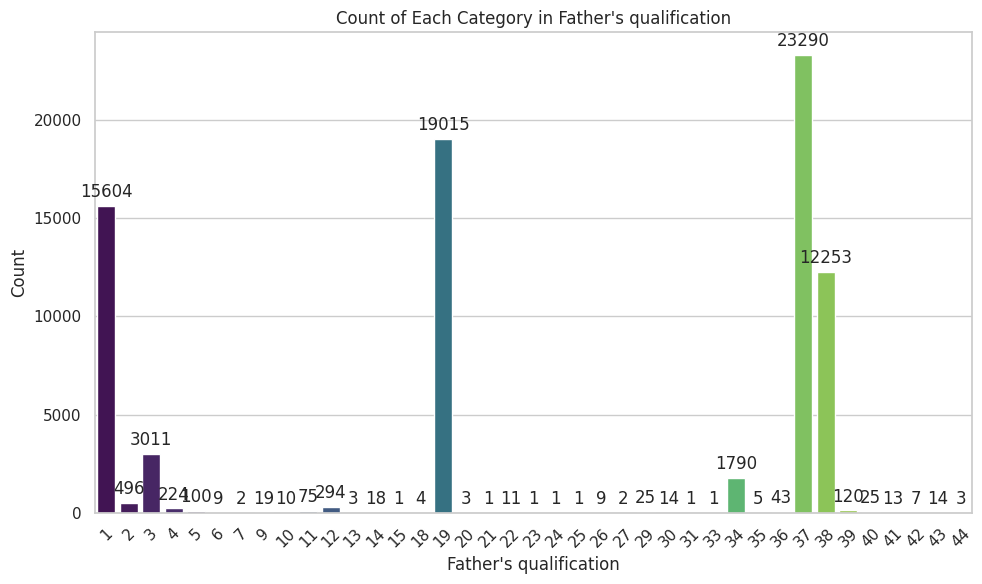

<ipython-input-21-61b0fbad5c6e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_train, palette='viridis')


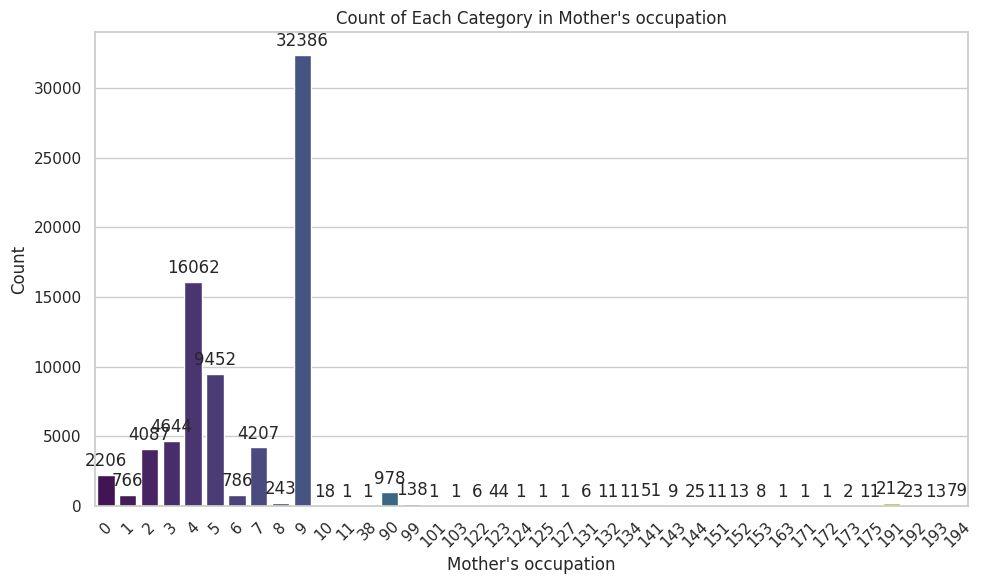

<ipython-input-21-61b0fbad5c6e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_train, palette='viridis')


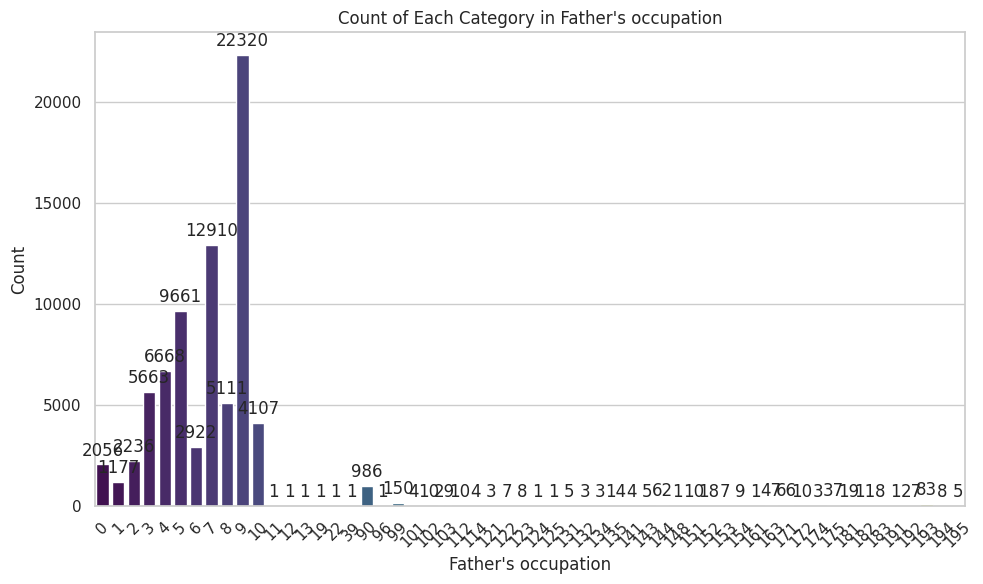

<ipython-input-21-61b0fbad5c6e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_train, palette='viridis')


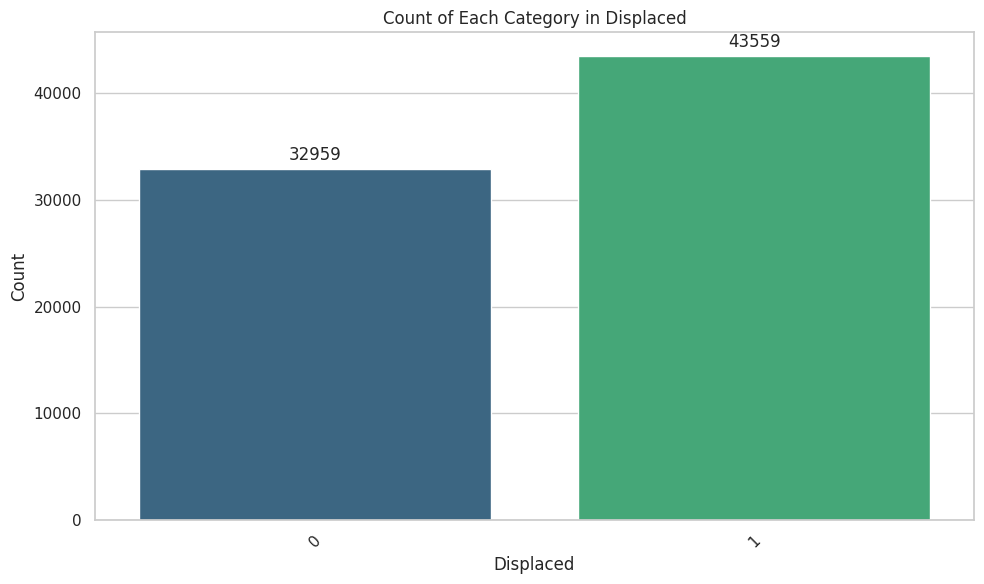

<ipython-input-21-61b0fbad5c6e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_train, palette='viridis')


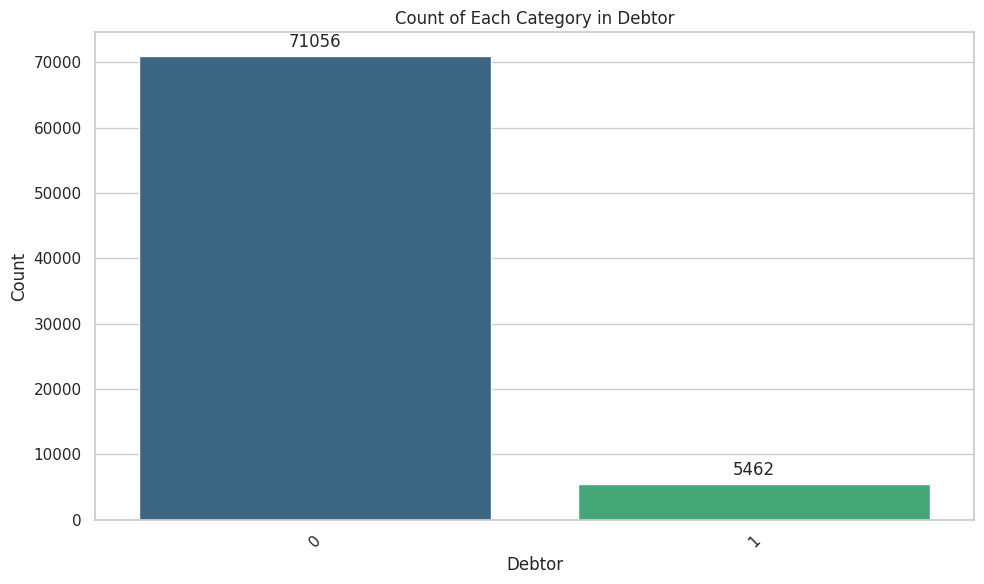

<ipython-input-21-61b0fbad5c6e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_train, palette='viridis')


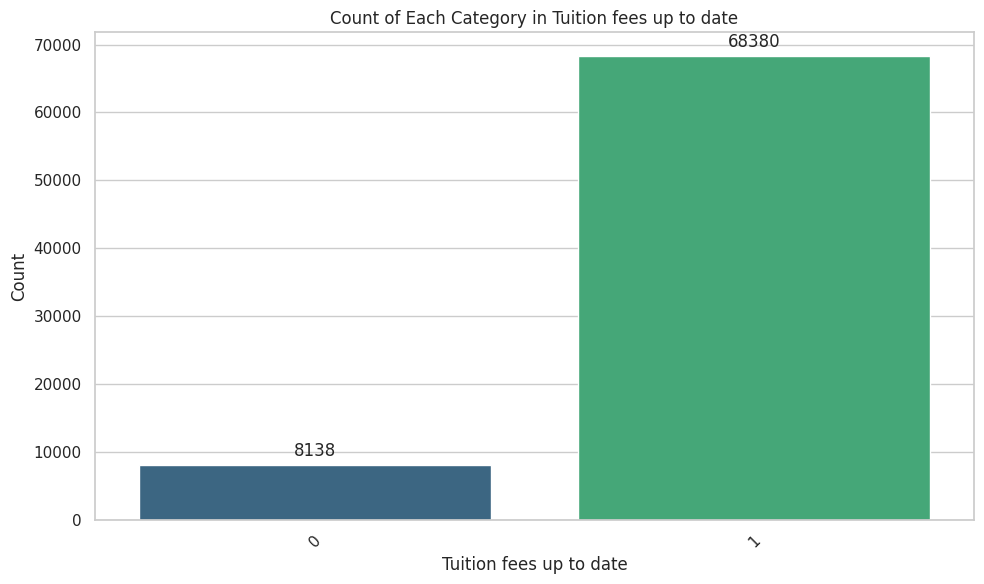

<ipython-input-21-61b0fbad5c6e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_train, palette='viridis')


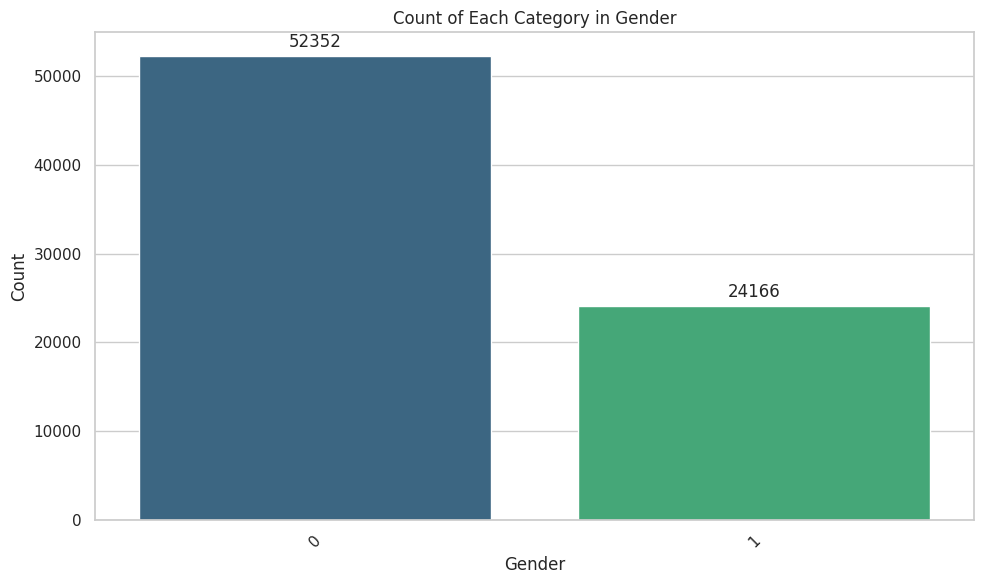

<ipython-input-21-61b0fbad5c6e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_train, palette='viridis')


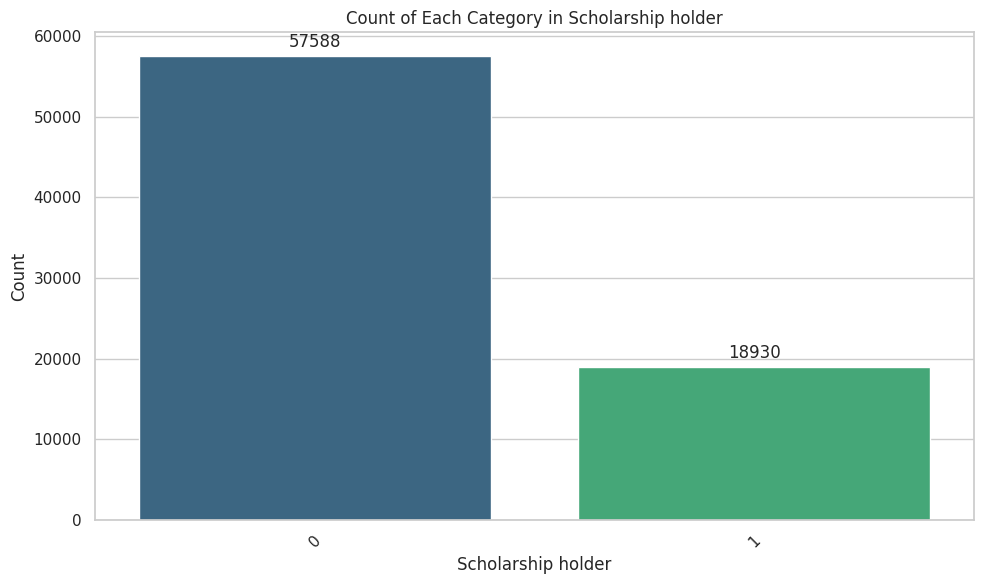

In [ ]:
# Plot bar graphs with counts
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    count_plot = sns.countplot(x=col, data=df_train, palette='viridis')

    # Add counts on top of the bars
    for p in count_plot.patches:
        count_plot.annotate(format(p.get_height(), '.0f'),
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha = 'center', va = 'center',
                            xytext = (0, 10),
                            textcoords = 'offset points')

    plt.title(f'Count of Each Category in {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<ipython-input-22-231753291a3f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_test, palette='viridis')


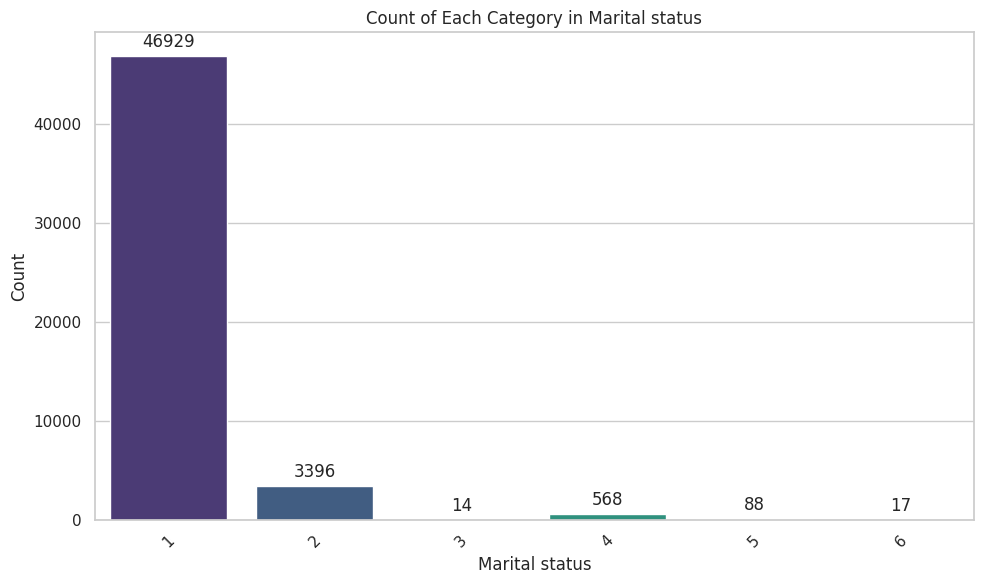

<ipython-input-22-231753291a3f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_test, palette='viridis')


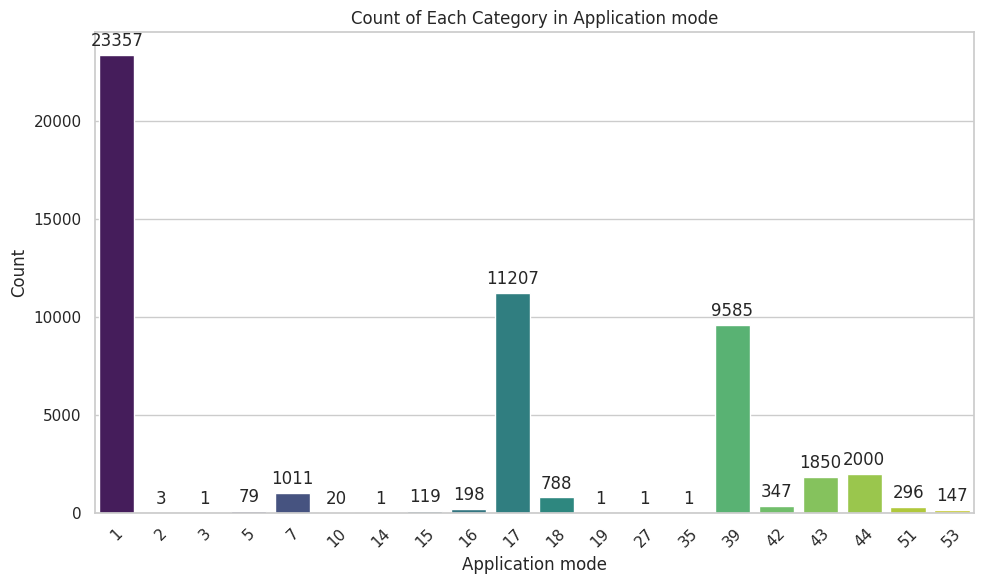

<ipython-input-22-231753291a3f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_test, palette='viridis')


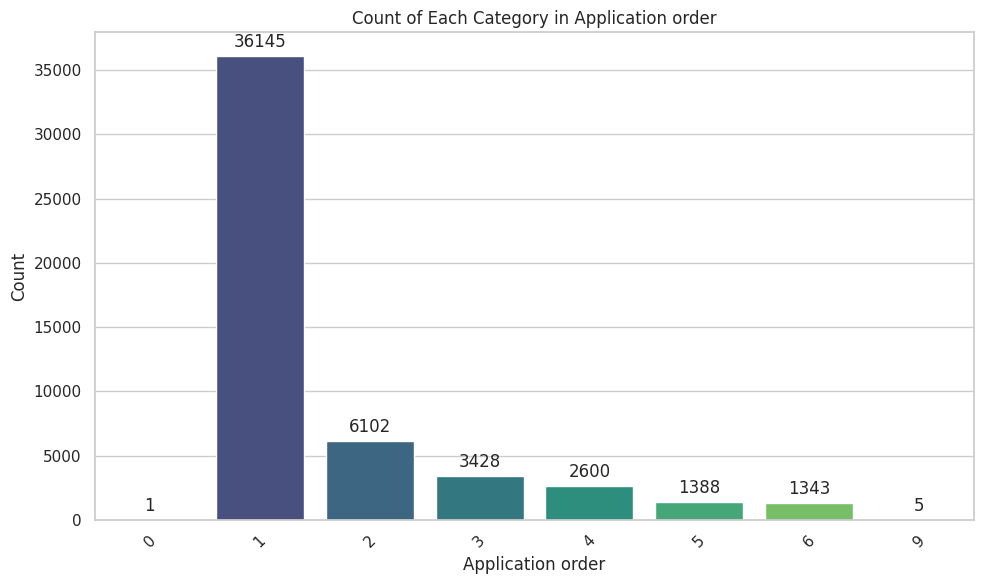

<ipython-input-22-231753291a3f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_test, palette='viridis')


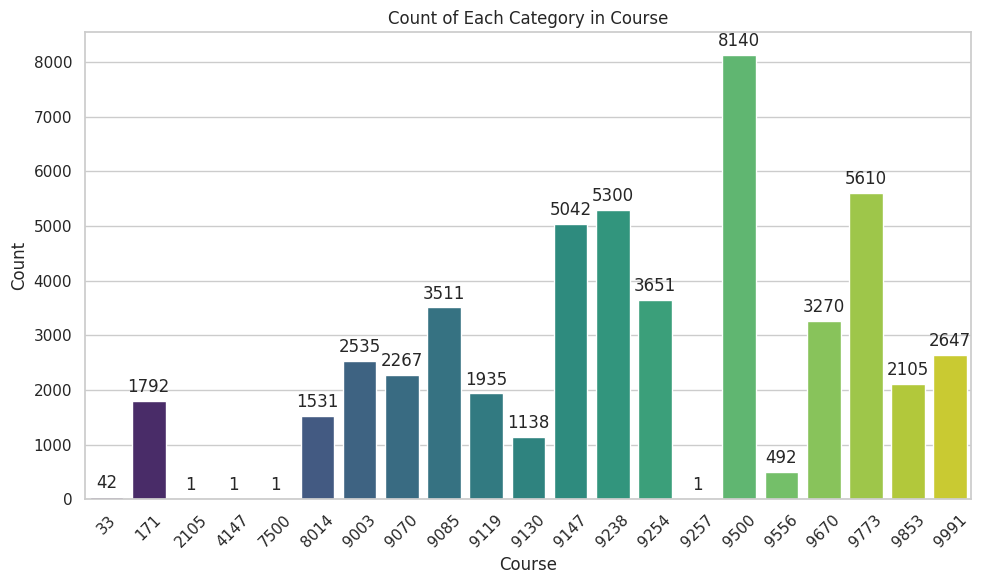

<ipython-input-22-231753291a3f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_test, palette='viridis')


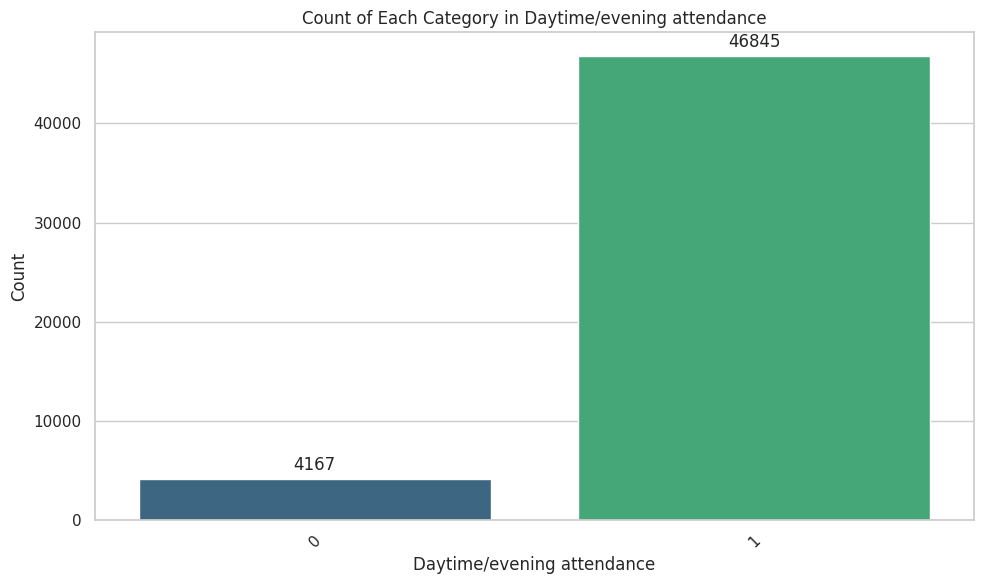

<ipython-input-22-231753291a3f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_test, palette='viridis')


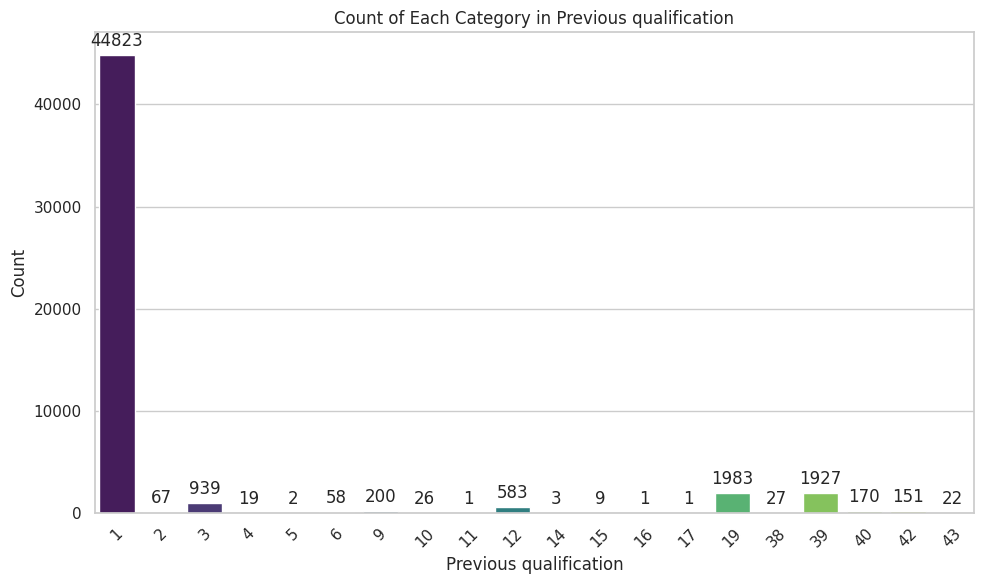

<ipython-input-22-231753291a3f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_test, palette='viridis')


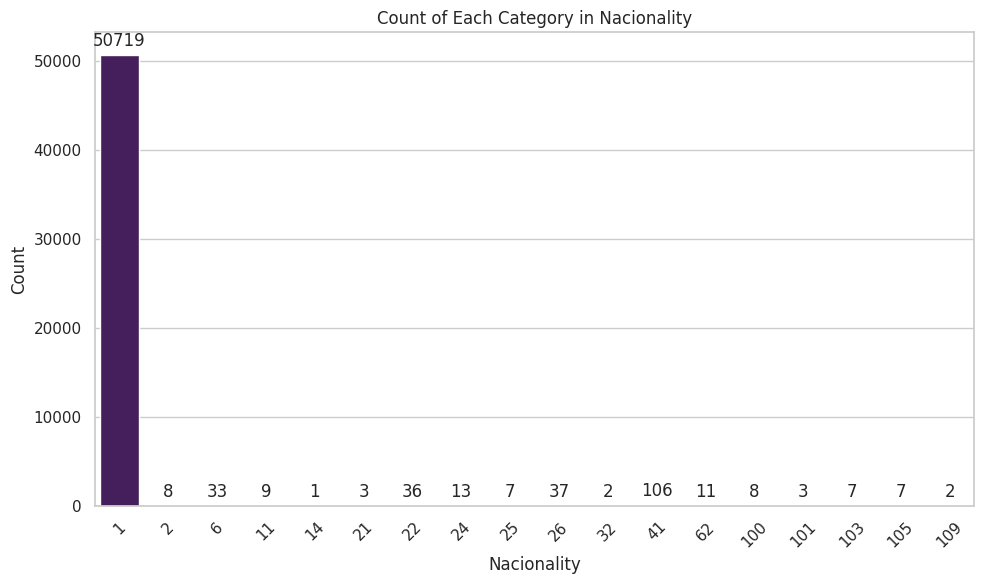

<ipython-input-22-231753291a3f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_test, palette='viridis')


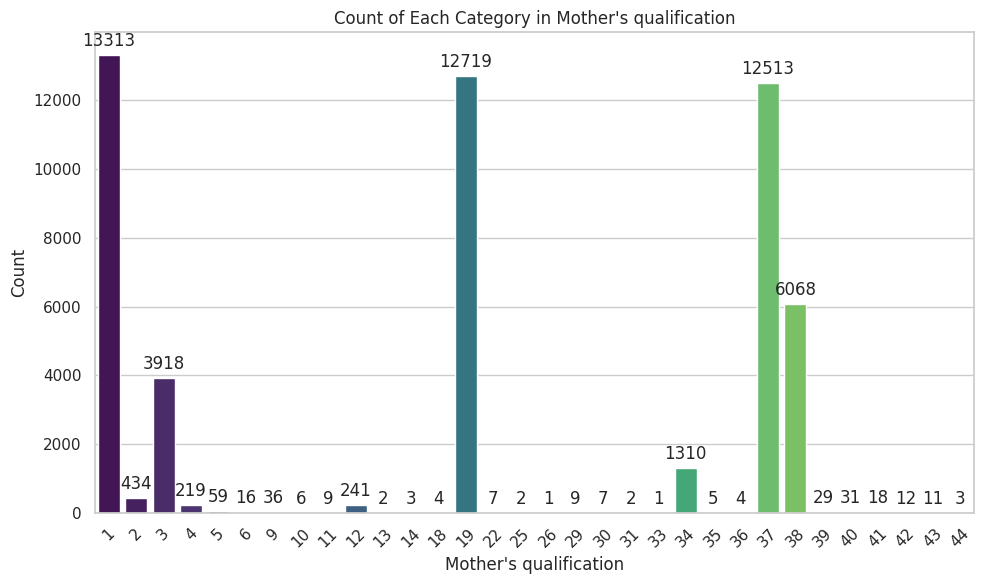

<ipython-input-22-231753291a3f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_test, palette='viridis')


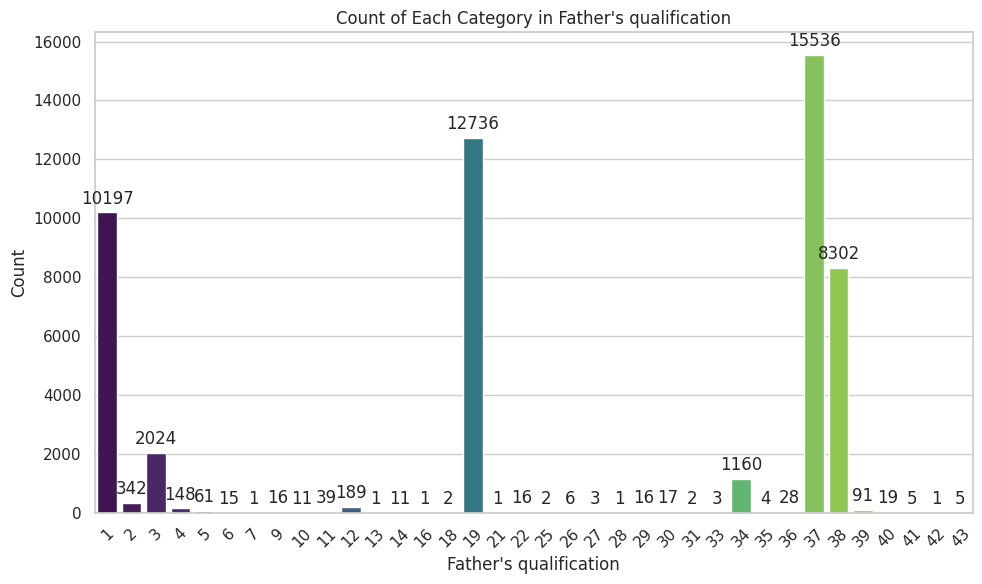

<ipython-input-22-231753291a3f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_test, palette='viridis')


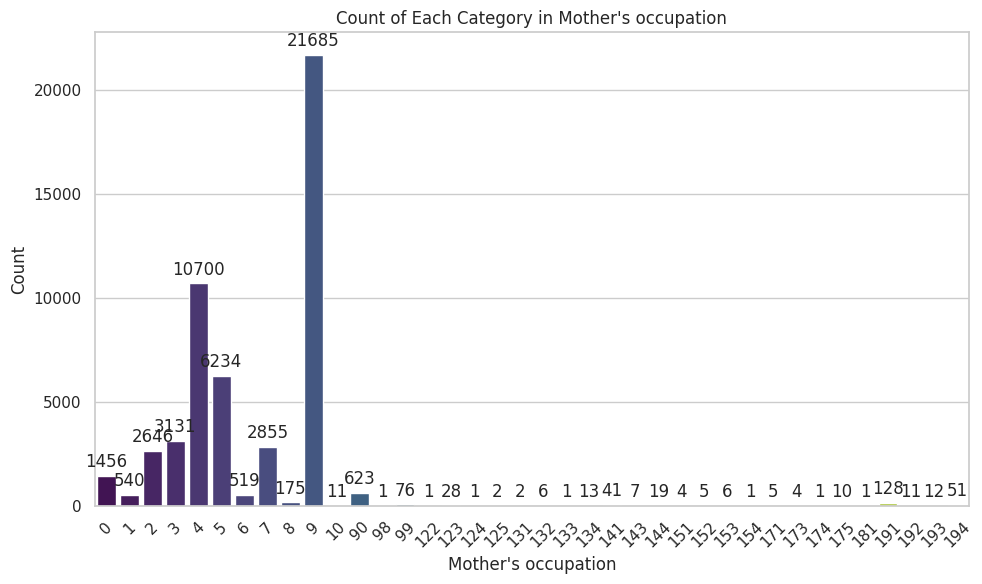

<ipython-input-22-231753291a3f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_test, palette='viridis')


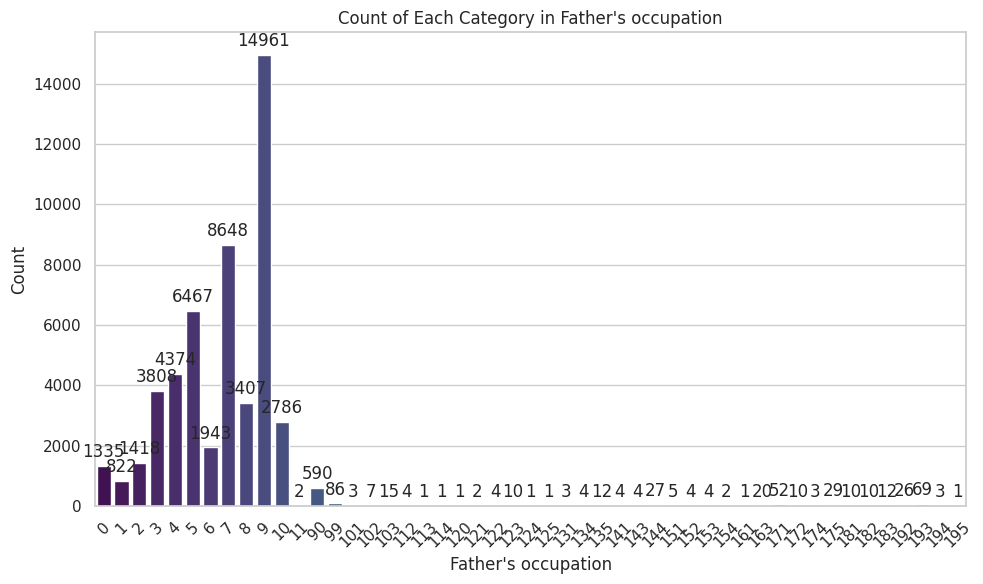

<ipython-input-22-231753291a3f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_test, palette='viridis')


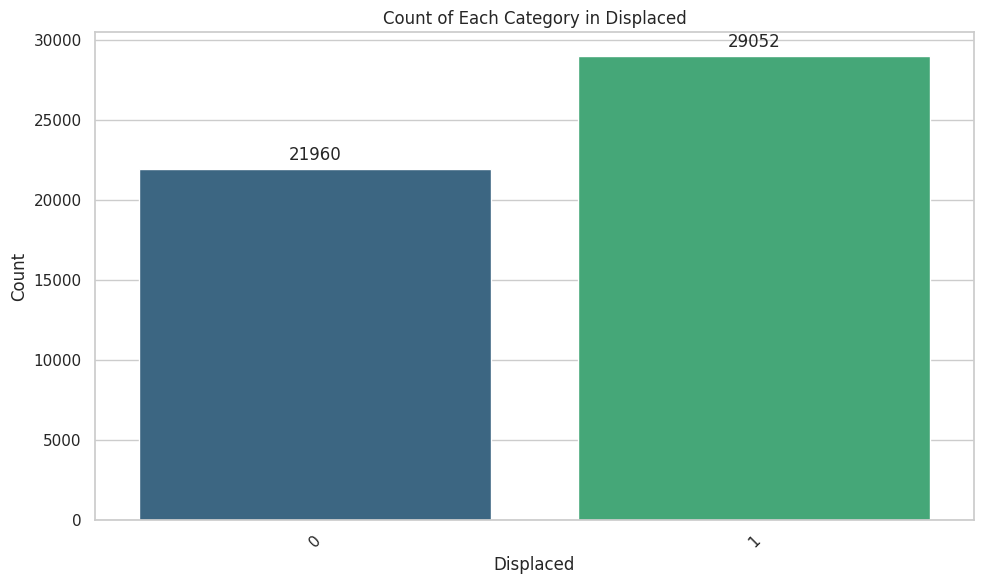

<ipython-input-22-231753291a3f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_test, palette='viridis')


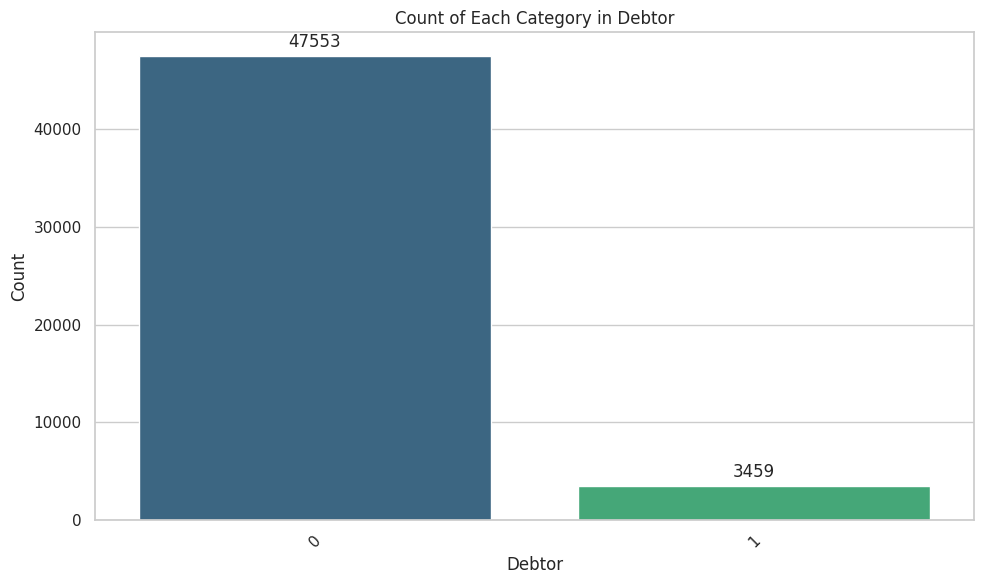

<ipython-input-22-231753291a3f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_test, palette='viridis')


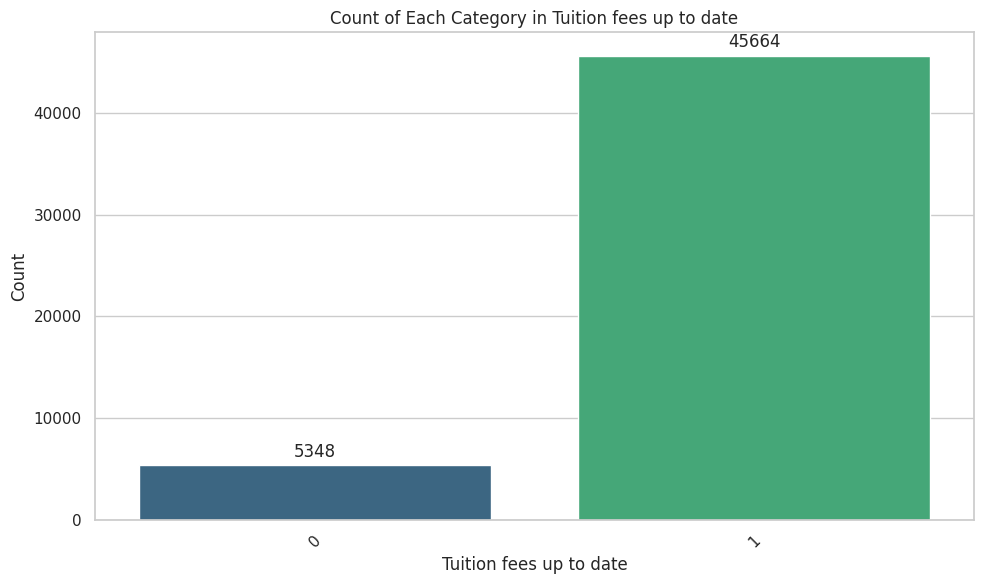

<ipython-input-22-231753291a3f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_test, palette='viridis')


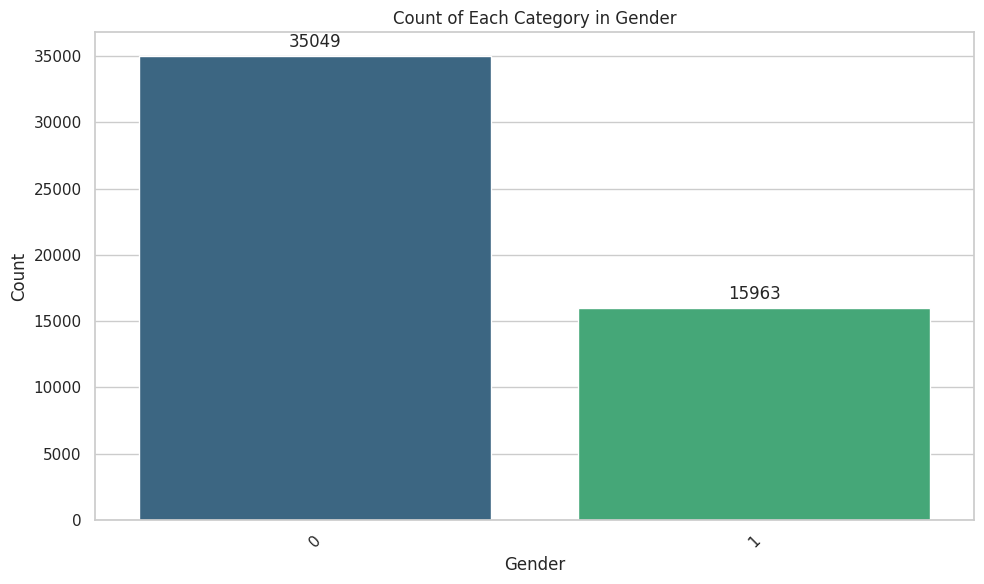

<ipython-input-22-231753291a3f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=col, data=df_test, palette='viridis')


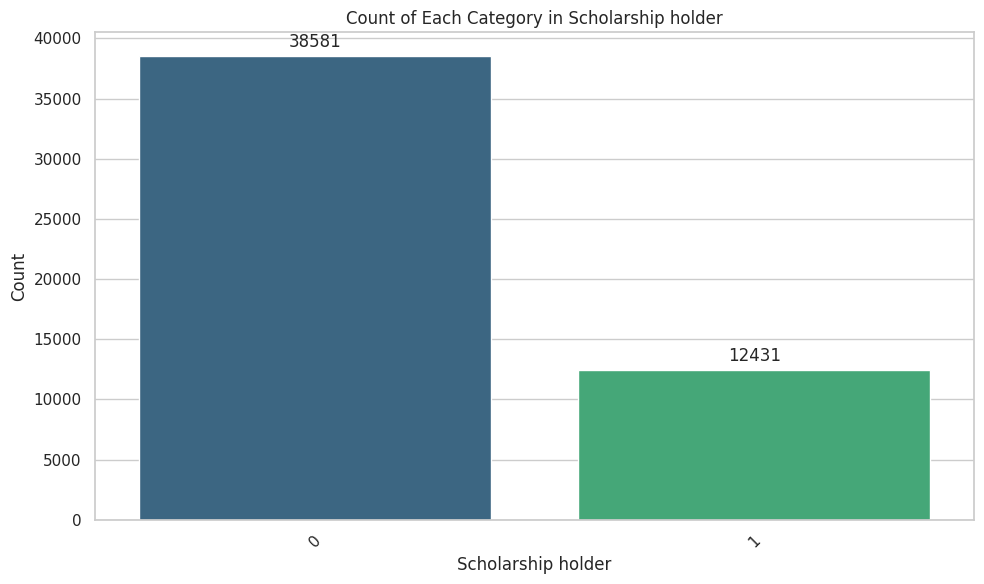

In [ ]:
# Plot bar graphs with counts
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    count_plot = sns.countplot(x=col, data=df_test, palette='viridis')

    # Add counts on top of the bars
    for p in count_plot.patches:
        count_plot.annotate(format(p.get_height(), '.0f'),
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha = 'center', va = 'center',
                            xytext = (0, 10),
                            textcoords = 'offset points')

    plt.title(f'Count of Each Category in {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
categorical_cols

['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Displaced',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder']

In [ ]:

# # List of values to remove
# values_AppMode = [2,3,4,9,12,26,27,35]
# # Remove rows where 'Age at enrollment' is in the values_to_remove list
# df_train = df_train[~df_train['Application mode'].isin(values_AppMode)]



In [ ]:
# values_AppOrder = [0,9]
# df_train = df_train[~df_train['Application order'].isin(values_AppOrder)]

In [ ]:
# values_Cours = [39,979]
# df_train = df_train[~df_train['Course'].isin(values_Cours)]

In [ ]:
# values_PrevQual = [5,11,14,15,17,36,37]
# df_train = df_train[~df_train['Previous qualification'].isin(values_PrevQual)]

In [ ]:
# values_motherQual = [7,8,14,15,18,22,26,27,28,31,33,44]
# df_train = df_train[~df_train["Mother's qualification"].isin(values_motherQual)]

In [ ]:
# values_fatherQual = [6,7,15,18,20,21,23,24,25,27,31,33]
# df_train = df_train[~df_train["Father's qualification"].isin(values_fatherQual)]

In [ ]:
# values_motherOcup = [11,38,101,103,124,125,127,163,171,172,173]
# df_train = df_train[~df_train["Mother's occupation"].isin(values_motherOcup)]

In [ ]:
# values_fatherOcup = [11,12,13,19,22,123,124,131,195]
# df_train = df_train[~df_train["Mother's occupation"].isin(values_fatherOcup)]

In [ ]:
# df_train = df_train.drop(columns=['id', 'Nacionality'], axis=1)


In [ ]:
# df_train

In [ ]:
# categorical_cols

In [ ]:
# for i in categorical_cols:
#   print(df_train[i].value_counts())

In [ ]:
# df = pd.DataFrame(df_train)

# # List of integer columns
# integer_cols = [
#     'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
#     'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
#     'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)',
#     'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
#     'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',
#     'Curricular units 2nd sem (without evaluations)'
# ]

# # Remove outliers
# for col in integer_cols:
#     df = df[df[col] >= 10]

# # Print the cleaned DataFrame
# print("Cleaned DataFrame:")
# print(df)

In [ ]:
# #Ploting the box plot of the integer data
# df = pd.DataFrame(df_train)

# integer_cols = ['Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
#                 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
#                 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
#                 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',
#                 'Curricular units 2nd sem (without evaluations)']

# # Plotting boxplots for each integer column
# plt.figure(figsize=(12, 8))
# sns.set(style="whitegrid")
# sns.boxplot(data=df[integer_cols])
# plt.title('Boxplots of Integer Columns')
# plt.xticks(rotation=45)
# plt.xlabel('Columns')
# plt.ylabel('Values')
# plt.tight_layout()
# plt.show()

In [ ]:
# # Create DataFrame
# df = pd.DataFrame(df_train)

# # List of integer columns
# integer_cols = [
#     'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
#     'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
#     'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)',
#     'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
#     'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',
#     'Curricular units 2nd sem (without evaluations)'
# ]

# # Remove outliers
# for col in integer_cols:
#     df = df[df[col] >= 10]

# # Plot histograms and print counts
# for col in integer_cols:
#     plt.figure(figsize=(10, 6))
#     sns.histplot(df[col], bins=10, kde=True)
#     plt.title(f'Histogram for {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     plt.show()

#     # Print counts
#     print(f'Counts for {col}:')
#     print(df[col].value_counts().sort_index())
#     print('\n')

# Modelling

## Multiple Logistic Regression for Integer Data

In [ ]:
#Multiple Logisitic regression for integer data
integer_cols = ['Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
                'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)']

# Separate features and target
X =df_train[integer_cols]
y = df_train['Target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, scale your features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))

# Print coefficients for each class
print('Coefficients:')
for i, class_name in enumerate(model.classes_):
    print(f'Class: {class_name}')
    for feature, coef in zip(X.columns, model.coef_[i]):
        print(f'{feature}: {coef:.4f}')
    print()

# Make predictions on new data if needed
# new_data = pd.DataFrame({'feature1': [11], 'feature2': [15], 'feature3': [0]})
# y_pred_new = model.predict(scaler.transform(new_data))
# print(f'Predicted class for new data: {y_pred_new[0]}')

Accuracy: 0.80
              precision    recall  f1-score   support

     Dropout       0.88      0.79      0.84      5028
    Enrolled       0.60      0.51      0.55      3017
    Graduate       0.82      0.93      0.87      7259

    accuracy                           0.80     15304
   macro avg       0.77      0.74      0.75     15304
weighted avg       0.80      0.80      0.80     15304

Coefficients:
Class: Dropout
Age at enrollment: 0.2141
Curricular units 1st sem (credited): 0.0778
Curricular units 1st sem (enrolled): 0.2445
Curricular units 1st sem (evaluations): 0.0453
Curricular units 1st sem (approved): -0.6698
Curricular units 1st sem (grade): -0.0361
Curricular units 1st sem (without evaluations): -0.0142
Curricular units 2nd sem (credited): 0.1100
Curricular units 2nd sem (enrolled): 0.5342
Curricular units 2nd sem (evaluations): 0.0228
Curricular units 2nd sem (approved): -1.3727
Curricular units 2nd sem (grade): -0.5345
Curricular units 2nd sem (without evaluations): 0

## Multiple Logistic Regression for Categorical Data

In [ ]:
#Multiple Logisitic regression for integer data
categorical_cols = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification","Mother's occupation", "Father's occupation", 'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder']


# Separate features and target
X =df_train[categorical_cols]
y = df_train['Target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, scale your features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))

# Print coefficients for each class
print('Coefficients:')
for i, class_name in enumerate(model.classes_):
    print(f'Class: {class_name}')
    for feature, coef in zip(X.columns, model.coef_[i]):
        print(f'{feature}: {coef:.4f}')
    print()

# Make predictions on new data if needed
# new_data = pd.DataFrame({'feature1': [11], 'feature2': [15], 'feature3': [0]})
# y_pred_new = model.predict(scaler.transform(new_data))
# print(f'Predicted class for new data: {y_pred_new[0]}')

Accuracy: 0.64
              precision    recall  f1-score   support

     Dropout       0.65      0.70      0.67      5028
    Enrolled       0.36      0.02      0.04      3017
    Graduate       0.65      0.86      0.74      7259

    accuracy                           0.64     15304
   macro avg       0.55      0.53      0.49     15304
weighted avg       0.59      0.64      0.58     15304

Coefficients:
Class: Dropout
Marital status: 0.0239
Application mode: 0.3245
Application order: 0.0454
Course: -0.2680
Daytime/evening attendance: 0.0161
Previous qualification: -0.0971
Nacionality: -0.0191
Mother's qualification: 0.1498
Father's qualification: -0.0632
Mother's occupation: -0.0296
Father's occupation: 0.0223
Displaced: -0.0297
Debtor: 0.1048
Tuition fees up to date: -0.6876
Gender: 0.2374
Scholarship holder: -0.4161

Class: Enrolled
Marital status: -0.0334
Application mode: -0.0304
Application order: -0.1140
Course: 0.1337
Daytime/evening attendance: 0.0636
Previous qualification:

## Multiple Logistic Regression for Float Data

In [ ]:
#Multiple Logisitic regression for integer data
float_cols = ['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP']

 {'border_count': 128, 'depth': 6, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.1}


# Separate features and target
X =df_train[float_cols]
y = df_train['Target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, scale your features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))

# Print coefficients for each class
print('Coefficients:')
for i, class_name in enumerate(model.classes_):
    print(f'Class: {class_name}')
    for feature, coef in zip(X.columns, model.coef_[i]):
        print(f'{feature}: {coef:.4f}')
    print()

# Make predictions on new data if needed
# new_data = pd.DataFrame({'feature1': [11], 'feature2': [15], 'feature3': [0]})
# y_pred_new = model.predict(scaler.transform(new_data))
# print(f'Predicted class for new data: {y_pred_new[0]}')

Accuracy: 0.72
              precision    recall  f1-score   support

     Dropout       0.91      0.71      0.80      5028
    Enrolled       0.49      0.12      0.19      3017
    Graduate       0.66      0.97      0.78      7259

    accuracy                           0.72     15304
   macro avg       0.69      0.60      0.59     15304
weighted avg       0.71      0.72      0.67     15304

Coefficients:
Class: Dropout
Previous qualification (grade): -0.0360
Admission grade: -0.0976
Curricular units 1st sem (grade): -0.5004
Curricular units 2nd sem (grade): -1.3166
Unemployment rate: 0.0463
Inflation rate: 0.0061
GDP: -0.0379

Class: Enrolled
Previous qualification (grade): -0.0745
Admission grade: -0.0277
Curricular units 1st sem (grade): -0.2310
Curricular units 2nd sem (grade): -0.0347
Unemployment rate: -0.0998
Inflation rate: -0.0063
GDP: -0.0514

Class: Graduate
Previous qualification (grade): 0.1105
Admission grade: 0.1253
Curricular units 1st sem (grade): 0.7314
Curricular un

In [ ]:
df_train.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

## Using CatBooster after adding the new column by doing the feature engineering

In [ ]:
# # Define your categorical, integer, and float columns
# categorical_cols = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance',
#                     'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification",
#                     "Mother's occupation", "Father's occupation", 'Displaced', 'Debtor', 'Tuition fees up to date',
#                     'Gender', 'Scholarship holder']
# integer_cols = ['Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
#                 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
#                 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
#                 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',
#                 'Curricular units 2nd sem (without evaluations)']
# float_cols = ['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
#               'Unemployment rate', 'Inflation rate', 'GDP']

# # Encode categorical variables
# label_encoder = LabelEncoder()
# for col in categorical_cols:
#     df_train[col] = label_encoder.fit_transform(df_train[col])

# # Normalize numerical columns
# scaler = StandardScaler()
# df_train[integer_cols + float_cols] = scaler.fit_transform(df_train[integer_cols + float_cols])

# Split data into features and target
X =df_train.drop('Target', axis=1)
y = df_train['Target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train CatBoost classifier
catboost_model = CatBoostClassifier(border_count = 128, depth = 8, iterations = 1000, l2_leaf_reg = 5, learning_rate = 0.5)
catboost_model.fit(X_train, y_train)

# Predict on test set
y_pred = catboost_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Generate classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

# Extract feature importances
feature_importances = catboost_model.get_feature_importance()
features = X.columns

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances_df)



0:	learn: 0.6886471	total: 138ms	remaining: 2m 18s
1:	learn: 0.5723269	total: 263ms	remaining: 2m 11s
2:	learn: 0.5225442	total: 403ms	remaining: 2m 13s
3:	learn: 0.4995224	total: 527ms	remaining: 2m 11s
4:	learn: 0.4825559	total: 661ms	remaining: 2m 11s
5:	learn: 0.4729011	total: 785ms	remaining: 2m 10s
6:	learn: 0.4658138	total: 914ms	remaining: 2m 9s
7:	learn: 0.4601630	total: 1.04s	remaining: 2m 8s
8:	learn: 0.4574333	total: 1.23s	remaining: 2m 15s
9:	learn: 0.4549165	total: 1.48s	remaining: 2m 26s
10:	learn: 0.4518596	total: 1.71s	remaining: 2m 33s
11:	learn: 0.4493563	total: 1.96s	remaining: 2m 40s
12:	learn: 0.4473931	total: 2.19s	remaining: 2m 46s
13:	learn: 0.4460484	total: 2.43s	remaining: 2m 51s
14:	learn: 0.4437568	total: 2.67s	remaining: 2m 55s
15:	learn: 0.4416757	total: 2.88s	remaining: 2m 57s
16:	learn: 0.4402655	total: 3.1s	remaining: 2m 59s
17:	learn: 0.4381845	total: 3.34s	remaining: 3m 2s
18:	learn: 0.4361077	total: 3.6s	remaining: 3m 5s
19:	learn: 0.4351397	total: 

In [ ]:
prediction = catboost_model.predict(df_test)
prediction

array([['Dropout'],
       ['Graduate'],
       ['Graduate'],
       ...,
       ['Dropout'],
       ['Dropout'],
       ['Dropout']], dtype=object)

In [ ]:
prediction = prediction.reshape(-1)
prediction


array(['Dropout', 'Graduate', 'Graduate', ..., 'Dropout', 'Dropout',
       'Dropout'], dtype=object)

In [ ]:
a = pd.DataFrame({
    'id': df_test['id'],
    'Target': prediction
})

In [ ]:
a.to_csv('Submission12.csv', index = False)

In [ ]:
a

id    Target
0       76518   Dropout
1       76519  Graduate
2       76520  Graduate
3       76521  Graduate
4       76522  Enrolled
...       ...       ...
51007  127525   Dropout
51008  127526   Dropout
51009  127527   Dropout
51010  127528   Dropout
51011  127529   Dropout

[51012 rows x 2 columns]

## Using the AutoML to predict the best parameter and the best algorithm for the data

In [ ]:
# from flaml import AutoML
# automl = AutoML()

In [ ]:



# # Split features and target
# y = df_train['Target']  # Ensure y is a numpy array
# X = df_train.drop('Target', axis=1)  # Ensure X is a numpy array

# # Initialize AutoML
# automl = AutoML()

# # Fit AutoML model
# automl.fit(X, y, task="classification", metric='roc_auc_ovo_weighted', time_budget=3600*3)

# # Output the best estimator, hyperparameters, validation score, and training duration
# print("Best ML learner:", automl.best_estimator)
# print("Best hyperparameter config:", automl.best_config)
# print("Best roc_auc_ovo_weighted on validation data:", automl.best_loss)
# print("Training duration of best run:", automl.best_config_train_time)


[flaml.automl.logger: 06-15 08:39:24] {1680} INFO - task = classification
[flaml.automl.logger: 06-15 08:39:24] {1691} INFO - Evaluation method: cv
[flaml.automl.logger: 06-15 08:39:24] {1789} INFO - Minimizing error metric: 1-roc_auc_ovo_weighted
[flaml.automl.logger: 06-15 08:39:24] {1901} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 06-15 08:39:24] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 06-15 08:39:26] {2345} INFO - Estimated sufficient time budget=24506s. Estimated necessary time budget=602s.
[flaml.automl.logger: 06-15 08:39:26] {2392} INFO -  at 3.3s,	estimator lgbm's best error=0.1028,	best estimator lgbm's best error=0.1028
[flaml.automl.logger: 06-15 08:39:26] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 06-15 08:39:28] {2392} INFO -  at 5.7s,	estimator lgbm's best error=0.1028,	best estimator lgbm's best error=0.1028
[flaml.a

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  wa

[flaml.automl.logger: 06-15 09:14:06] {2392} INFO -  at 2083.7s,	estimator lrl1's best error=0.2774,	best estimator xgboost's best error=0.0657
[flaml.automl.logger: 06-15 09:14:06] {2219} INFO - iteration 104, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 06-15 09:15:30] {2392} INFO -  at 2166.8s,	estimator lrl1's best error=0.2774,	best estimator xgboost's best error=0.0657
[flaml.automl.logger: 06-15 09:15:30] {2219} INFO - iteration 105, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 06-15 09:15:47] {2392} INFO -  at 2184.6s,	estimator lgbm's best error=0.0669,	best estimator xgboost's best error=0.0657
[flaml.automl.logger: 06-15 09:15:47] {2219} INFO - iteration 106, current learner xgb_limitdepth
[flaml.automl.logger: 06-15 09:15:56] {2392} INFO -  at 2193.6s,	estimator xgb_limitdepth's best error=0.0677,	best estimator xgboost's best error=0.0657
[flaml.automl.logger: 06-15 09:15:56] {2219} INFO - iteration 107, current learner xgb_limitdepth
[flaml.automl.logger: 06-15 09:16:02] {2392} INFO -  at 2199.7s,	estimator xgb_limitdepth's best error=0.0677,	best estimator xgboost's best error=0.0657
[flaml.automl.logger: 06-15 09:16:02] {2219} INFO - iteration 108, current learner xgb_limitdepth
[flaml.automl.logger: 06-15 09:16:23] {2392} INFO -  at 2220.4s,	estimator xgb_limitdepth's best error=0.0675,	best estimator xgboost's best error=0.0657
[flaml.automl.logger: 06-15 09:16:23] {2219} INFO - iteration 109, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 06-15 09:17:45] {2392} INFO -  at 2301.9s,	estimator lrl1's best error=0.2774,	best estimator xgboost's best error=0.0657
[flaml.automl.logger: 06-15 09:17:45] {2219} INFO - iteration 110, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 06-15 09:18:58] {2392} INFO -  at 2375.6s,	estimator xgboost's best error=0.0657,	best estimator xgboost's best error=0.0657
[flaml.automl.logger: 06-15 09:18:58] {2219} INFO - iteration 111, current learner lrl1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 06-15 09:20:17] {2392} INFO -  at 2454.4s,	estimator lrl1's best error=0.2774,	best estimator xgboost's best error=0.0657
[flaml.automl.logger: 06-15 09:20:17] {2219} INFO - iteration 112, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 06-15 09:20:37] {2392} INFO -  at 2474.1s,	estimator extra_tree's best error=0.0759,	best estimator xgboost's best error=0.0657
[flaml.automl.logger: 06-15 09:20:37] {2219} INFO - iteration 113, current learner lgbm
[flaml.automl.logger: 06-15 09:22:05] {2392} INFO -  at 2561.8s,	estimator lgbm's best error=0.0664,	best estimator xgboost's best error=0.0657
[flaml.automl.logger: 06-15 09:22:05] {2219} INFO - iteration 114, current learner xgb_limitdepth
[flaml.automl.logger: 06-15 09:22:18] {2392} INFO -  at 2575.2s,	estimator xgb_limitdepth's best error=0.0675,	best estimator xgboost's best error=0.0657
[flaml.automl.logger: 06-15 09:22:18] {2219} INFO - iteration 115, current learner extra_tree
[flaml.automl.logger: 06-15 09:22:27] {2392} INFO -  at 2583.9s,	estimator extra_tree's best error=0.0759,	best estimator xgboost's best error=0.0657
[flaml.automl.logger: 06-15 09:22:27] {2219} INFO - iteration 116, current learner xgb_limitdepth
[flaml.automl.logger: 06

# Hyperparameter tunning of the different algorithms

## predicting some of the important columns

In [ ]:

# # Assuming df and target (y) are already defined
# X = df_train.drop('Target', axis=1)
# y = df_train['Target']

# # Select top k features
# selector = SelectKBest(score_func=f_classif, k=10)
# X_selected = selector.fit_transform(X, y)

# # Get selected feature names
# selected_features = X.columns[selector.get_support(indices=True)]
# print("Selected features:", selected_features)


Selected features: Index(['Application mode', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)'],
      dtype='object')


In [ ]:
# from imblearn.over_sampling import SMOTE

# # Handle class imbalance using SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# print("After resampling, counts of label '1': {}".format(sum(y_resampled == 1)))
# print("After resampling, counts of label '0': {}".format(sum(y_resampled == 0)))
# print("After resampling, counts of label '2': {}".format(sum(y_resampled == 2)))

After resampling, counts of label '1': 0
After resampling, counts of label '0': 0
After resampling, counts of label '2': 0


## Grid Search for  the catboost to find the best parameter

In [ ]:
# not running due to high time complexity


# from sklearn.model_selection import GridSearchCV
# from catboost import CatBoostClassifier
# X = df_train.drop(columns = ['Target'], axis = 1)
# y = df_train['Target']
# # Define the parameter grid
# param_grid = {
#     'border_count': [64, 128, 254],
#     'iterations': [1000, 1500, 2000],
#     'depth': [4, 6, 8],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'l2_leaf_reg': [1, 3, 5]
# }

# # Initialize the CatBoost classifier
# catboost_model = CatBoostClassifier()

# # Perform grid search
# grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, scoring='roc_auc_ovo_weighted', cv=3, n_jobs=-1)
# grid_search.fit(X, y)

# # Get the best estimator
# best_model = grid_search.best_estimator_
# print("Best parameters found: ", grid_search.best_params_)
# print("Best ROC AUC score: ", grid_search.best_score_)


## Catboost Classifier

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

# Best parameters found
# best_params = {'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 5, 'learning_rate': 0.5}

# Initialize the CatBoost classifier with the best parameters
best_model = CatBoostClassifier(depth = 8, iterations = 1000, l2_leaf_reg = 5, learning_rate = 0.5)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the best model
best_model.fit(X_train, y_train)

# Predict on validation set
y_pred = best_model.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


# Accuracy: 0.8194589649764767
# Classification Report:
#                precision    recall  f1-score   support

#      Dropout       0.88      0.84      0.86      5028
#     Enrolled       0.63      0.58      0.60      3017
#     Graduate       0.85      0.91      0.88      7259

#     accuracy                           0.82     15304
#    macro avg       0.79      0.77      0.78     15304
# weighted avg       0.82      0.82      0.82     15304

0:	learn: 0.6871429	total: 265ms	remaining: 4m 24s
1:	learn: 0.5731560	total: 497ms	remaining: 4m 7s
2:	learn: 0.5241857	total: 746ms	remaining: 4m 8s
3:	learn: 0.5006342	total: 950ms	remaining: 3m 56s
4:	learn: 0.4834840	total: 1.2s	remaining: 3m 59s
5:	learn: 0.4739252	total: 1.46s	remaining: 4m 1s
6:	learn: 0.4666107	total: 1.71s	remaining: 4m 2s
7:	learn: 0.4622377	total: 1.96s	remaining: 4m 2s
8:	learn: 0.4586260	total: 2.21s	remaining: 4m 3s
9:	learn: 0.4550384	total: 2.42s	remaining: 3m 59s
10:	learn: 0.4528731	total: 2.56s	remaining: 3m 49s
11:	learn: 0.4500593	total: 2.69s	remaining: 3m 41s
12:	learn: 0.4485045	total: 2.82s	remaining: 3m 34s
13:	learn: 0.4462507	total: 2.95s	remaining: 3m 27s
14:	learn: 0.4436294	total: 3.08s	remaining: 3m 22s
15:	learn: 0.4418002	total: 3.22s	remaining: 3m 18s
16:	learn: 0.4407501	total: 3.35s	remaining: 3m 13s
17:	learn: 0.4390912	total: 3.49s	remaining: 3m 10s
18:	learn: 0.4371094	total: 3.62s	remaining: 3m 7s
19:	learn: 0.4359470	total: 3.

## Catboost classifier with hyper parameteric tunning

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier


# Initialize the CatBoost classifier with the best parameters
best_model = CatBoostClassifier(depth = 8,
    iterations = 1500,
    learning_rate = 0.026111403303690425,
    l2_leaf_reg = 26.648168065161098,
    min_data_in_leaf = 1,
    # subsample = 0.8580490989206254,
    rsm = 0.5125814118774029)

# Split data into features and target
X =df_train.drop('Target', axis=1)
y = df_train['Target']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the best model
best_model.fit(X_train, y_train)

# Predict on validation set
y_pred = best_model.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


# Accuracy: 0.8335075797177208
# Classification Report:
#                precision    recall  f1-score   support

#      Dropout       0.90      0.83      0.87      5028
#     Enrolled       0.66      0.61      0.63      3017
#     Graduate       0.85      0.93      0.89      7259

#     accuracy                           0.83     15304
#    macro avg       0.81      0.79      0.80     15304
# weighted avg       0.83      0.83      0.83     15304


0:	learn: 1.0702766	total: 130ms	remaining: 3m 28s
1:	learn: 1.0446607	total: 272ms	remaining: 3m 37s
2:	learn: 1.0198478	total: 420ms	remaining: 3m 43s
3:	learn: 0.9975118	total: 563ms	remaining: 3m 44s
4:	learn: 0.9759940	total: 707ms	remaining: 3m 45s
5:	learn: 0.9561293	total: 865ms	remaining: 3m 49s
6:	learn: 0.9366166	total: 1.02s	remaining: 3m 51s
7:	learn: 0.9191309	total: 1.18s	remaining: 3m 54s
8:	learn: 0.9017788	total: 1.33s	remaining: 3m 55s
9:	learn: 0.8855577	total: 1.49s	remaining: 3m 56s
10:	learn: 0.8694725	total: 1.64s	remaining: 3m 57s
11:	learn: 0.8553379	total: 1.8s	remaining: 3m 58s
12:	learn: 0.8413895	total: 1.96s	remaining: 3m 59s
13:	learn: 0.8276328	total: 2.09s	remaining: 3m 56s
14:	learn: 0.8147531	total: 2.19s	remaining: 3m 51s
15:	learn: 0.8023801	total: 2.27s	remaining: 3m 44s
16:	learn: 0.7910149	total: 2.34s	remaining: 3m 38s
17:	learn: 0.7794023	total: 2.43s	remaining: 3m 33s
18:	learn: 0.7688173	total: 2.52s	remaining: 3m 29s
19:	learn: 0.7586013	to

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier


# Initialize the CatBoost classifier with the best parameters
best_model = CatBoostClassifier(depth = 8,
    iterations = 1100,
    learning_rate = 0.0522228066073808,
    l2_leaf_reg = 26.648168065161098,
    min_data_in_leaf = 1,
    # subsample = 0.8580490989206254,
    rsm = 0.5125814118774029)

# Split data into features and target
X =df_train.drop('Target', axis=1)
y = df_train['Target']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the best model
best_model.fit(X_train, y_train)

# Predict on validation set
y_pred = best_model.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


# Accuracy: 0.8335075797177208
# Classification Report:
#                precision    recall  f1-score   support

#      Dropout       0.90      0.83      0.87      5028
#     Enrolled       0.66      0.61      0.63      3017
#     Graduate       0.85      0.93      0.89      7259

#     accuracy                           0.83     15304
#    macro avg       0.81      0.79      0.80     15304
# weighted avg       0.83      0.83      0.83     15304


0:	learn: 0.8070703	total: 380ms	remaining: 6m 58s
1:	learn: 0.8093410	total: 642ms	remaining: 5m 52s
2:	learn: 0.8103212	total: 921ms	remaining: 5m 36s
3:	learn: 0.8093410	total: 1.2s	remaining: 5m 29s
4:	learn: 0.8087692	total: 1.46s	remaining: 5m 19s
5:	learn: 0.8088509	total: 1.76s	remaining: 5m 21s
6:	learn: 0.8087039	total: 1.94s	remaining: 5m 3s
7:	learn: 0.8094227	total: 2.2s	remaining: 5m
8:	learn: 0.8101741	total: 2.48s	remaining: 5m
9:	learn: 0.8106642	total: 2.75s	remaining: 4m 59s
10:	learn: 0.8107622	total: 3.01s	remaining: 4m 58s
11:	learn: 0.8111870	total: 3.32s	remaining: 5m 1s
12:	learn: 0.8118894	total: 3.6s	remaining: 5m
13:	learn: 0.8120365	total: 3.87s	remaining: 4m 59s
14:	learn: 0.8126082	total: 4.13s	remaining: 4m 59s
15:	learn: 0.8131963	total: 4.41s	remaining: 4m 58s
16:	learn: 0.8135721	total: 4.69s	remaining: 4m 58s
17:	learn: 0.8138988	total: 4.95s	remaining: 4m 57s
18:	learn: 0.8145032	total: 5.22s	remaining: 4m 56s
19:	learn: 0.8143562	total: 5.48s	remai

## Autogluon model

In [ ]:
# from autogluon.tabular import TabularDataset, TabularPredictor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report
# import pandas as pd

# # Split data into features and target
# X =df_train.drop('Target', axis=1)
# y = df_train['Target']

# # Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # Concatenate X_train and y_train for training data
# train_data = pd.concat([X_train, y_train], axis=1)

# # Concatenate X_val and y_val for validation data
# val_data = pd.concat([X_val, y_val], axis=1)

# # Convert data to Autogluon's TabularDataset format
# train_data_gluon = TabularDataset(train_data)
# val_data_gluon = TabularDataset(val_data)

# # Define the label column
# label = 'Target'  # Adjust 'Target' to your actual target column name

# # Initialize the TabularPredictor
# predictor = TabularPredictor(label=label, path='autogluon_models')

# # Fit models and tune hyperparameters
# predictor.fit(train_data_gluon)

# # Get predictions on validation data
# y_pred = predictor.predict(val_data_gluon)

# # Evaluate the model
# print("Accuracy:", accuracy_score(y_val, y_pred))
# print("Classification Report:\n", classification_report(y_val, y_pred))


# # Accuracy: 0.8334422373235756
# # Classification Report:
# #                precision    recall  f1-score   support

# #      Dropout       0.90      0.83      0.87      5028
# #     Enrolled       0.66      0.62      0.64      3017
# #     Graduate       0.86      0.92      0.89      7259

# #     accuracy                           0.83     15304
# #    macro avg       0.81      0.79      0.80     15304
# # weighted avg       0.83      0.83      0.83     15304


Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Tue Jun 18 14:18:04 UTC 2024
CPU Count:          2
Memory Avail:       9.27 GB / 12.67 GB (73.1%)
Disk Space Avail:   74.02 GB / 107.72 GB (68.7%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...

Accuracy: 0.8334422373235756
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.90      0.83      0.87      5028
    Enrolled       0.66      0.62      0.64      3017
    Graduate       0.86      0.92      0.89      7259

    accuracy                           0.83     15304
   macro avg       0.81      0.79      0.80     15304
weighted avg       0.83      0.83      0.83     15304



## XGBoost with Hyper-parameteric tunning

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have your data loaded into X and y

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder to your target variable and transform it
y_encoded = label_encoder.fit_transform(y)

# Verify the mapping
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:", mapping)  # This will print: {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}

# Assuming df_train is already defined and includes 'Target'
X = df_train.drop('Target', axis=1)
y = df_train['Target']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Parameters
xgboost_params = {
    'grow_policy': 'depthwise',
    'tree_method': 'hist',
    'enable_categorical': True,
    'gamma': 1,
    'n_estimators': 1300,
    'learning_rate': 0.026111403303690425,
    'max_depth': 10,
    'reg_lambda': 23.648168065161098,
    'min_child_weight': 1.0626186255116183,
    'subsample': 0.8580490989206254,
    'colsample_bytree': 0.5125814118774029
}

# Initialize XGBoost classifier with the provided parameters
model = xgb.XGBClassifier(**xgboost_params)

# Train the model
model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=True)

# To make predictions on validation set
predictions = model.predict(X_valid)

# Decode predictions back to original labels
predictions_decoded = label_encoder.inverse_transform(predictions)

# Decode y_valid back to original labels for classification report
y_valid_decoded = label_encoder.inverse_transform(y_valid)

# Evaluate accuracy on validation set
accuracy = accuracy_score(y_valid_decoded, predictions_decoded)
print(f"Accuracy: {accuracy:.4f}")

# Print validation score
validation_score = model.score(X_valid, y_valid)
print(f"Validation Score: {validation_score:.4f}")

# Print classification report
classification_rep = classification_report(y_valid_decoded, predictions_decoded, target_names=label_encoder.classes_)
print("Classification Report:\n", classification_rep)


# Accuracy: 0.8363
# Validation Score: 0.8363
# Classification Report:
#                precision    recall  f1-score   support

#      Dropout       0.90      0.84      0.87      5028
#     Enrolled       0.67      0.62      0.64      3017
#     Graduate       0.86      0.92      0.89      7259

#     accuracy                           0.84     15304
#    macro avg       0.81      0.79      0.80     15304
# weighted avg       0.83      0.84      0.83     15304
# leaderboard 487
# Arjun9465
# 0.83679


Label mapping: {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
[0]	validation_0-mlogloss:1.07643
[1]	validation_0-mlogloss:1.05677
[2]	validation_0-mlogloss:1.03675
[3]	validation_0-mlogloss:1.01753
[4]	validation_0-mlogloss:1.00009
[5]	validation_0-mlogloss:0.98239
[6]	validation_0-mlogloss:0.96599
[7]	validation_0-mlogloss:0.94951
[8]	validation_0-mlogloss:0.93447
[9]	validation_0-mlogloss:0.91983
[10]	validation_0-mlogloss:0.90549
[11]	validation_0-mlogloss:0.89223
[12]	validation_0-mlogloss:0.87808
[13]	validation_0-mlogloss:0.86594
[14]	validation_0-mlogloss:0.85312
[15]	validation_0-mlogloss:0.84033
[16]	validation_0-mlogloss:0.82817
[17]	validation_0-mlogloss:0.81724
[18]	validation_0-mlogloss:0.80653
[19]	validation_0-mlogloss:0.79539
[20]	validation_0-mlogloss:0.78538
[21]	validation_0-mlogloss:0.77540
[22]	validation_0-mlogloss:0.76578
[23]	validation_0-mlogloss:0.75650
[24]	validation_0-mlogloss:0.74812
[25]	validation_0-mlogloss:0.73910
[26]	validation_0-mlogloss:0.73068
[27]	

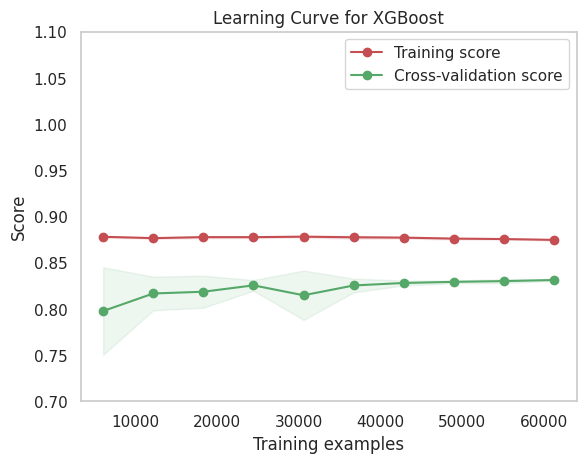

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np



# Plot learning curve
train_sizes, train_scores, valid_scores = learning_curve(model, X, y_encoded, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title("Learning Curve for XGBoost")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim(0.7, 1.1)

# Plot training score
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")

# Plot validation score
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color="g")

plt.legend(loc="best")
plt.grid()
plt.show()

## XGBoost with Hyper Parameteric tunning

Label mapping: {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
XGBoost Model - Training Classification Report
              precision    recall  f1-score   support

     Dropout       0.93      0.87      0.90     20268
    Enrolled       0.76      0.71      0.73     11923
    Graduate       0.88      0.95      0.91     29023

    accuracy                           0.87     61214
   macro avg       0.86      0.84      0.85     61214
weighted avg       0.87      0.87      0.87     61214

XGBoost Model - Validation Classification Report
              precision    recall  f1-score   support

     Dropout       0.90      0.84      0.87      5028
    Enrolled       0.67      0.62      0.64      3017
    Graduate       0.86      0.92      0.89      7259

    accuracy                           0.84     15304
   macro avg       0.81      0.79      0.80     15304
weighted avg       0.83      0.84      0.83     15304



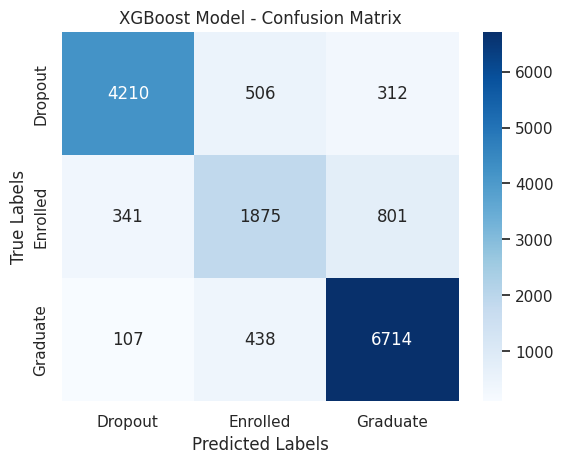

XGBoost Model Accuracy: 0.8363


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

# Assuming df_train is already defined and includes 'Target'
X = df_train.drop('Target', axis=1)
y = df_train['Target']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder to your target variable and transform it
y_encoded = label_encoder.fit_transform(y)

# Verify the mapping
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:", mapping)  # This will print: {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

# Define the XGBoost model with the specified hyperparameters
xgb_params = {
    'grow_policy': 'depthwise',
    'tree_method': 'hist',
    'enable_categorical': True,
    'gamma': 1,
    'n_estimators': 1300,
    'learning_rate': 0.026111403303690425,
    'max_depth': 10,
    'reg_lambda': 23.648168065161098,
    'min_child_weight': 1.0626186255116183,
    'subsample': 0.8580490989206254,
    'colsample_bytree': 0.5125814118774029
}

xgb_model = xgb.XGBClassifier(**xgb_params)
xgb_model.fit(X_train, y_train)

# Evaluate the XGBoost model
xgb_train_preds = xgb_model.predict(X_train)
xgb_valid_preds = xgb_model.predict(X_valid)

# Print classification report
print("XGBoost Model - Training Classification Report")
print(classification_report(y_train, xgb_train_preds, target_names=label_encoder.classes_))

print("XGBoost Model - Validation Classification Report")
print(classification_report(y_valid, xgb_valid_preds, target_names=label_encoder.classes_))

# Print confusion matrix
xgb_conf_matrix = confusion_matrix(y_valid, xgb_valid_preds)
sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("XGBoost Model - Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Evaluate accuracy on validation set
xgb_accuracy = accuracy_score(y_valid, xgb_valid_preds)
print(f"XGBoost Model Accuracy: {xgb_accuracy:.4f}")


## Probablity Prediction for all diff data types

Label mapping: {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CatBoost Model Accuracy: 0.6986
CatBoost Model Validation Score: 0.6986


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CatBoost Model Classification Report:
               precision    recall  f1-score   support

     Dropout       0.74      0.71      0.72      5028
    Enrolled       0.50      0.33      0.40      3017
    Graduate       0.72      0.84      0.78      7259

    accuracy                           0.70     15304
   macro avg       0.65      0.63      0.63     15304
weighted avg       0.68      0.70      0.69     15304



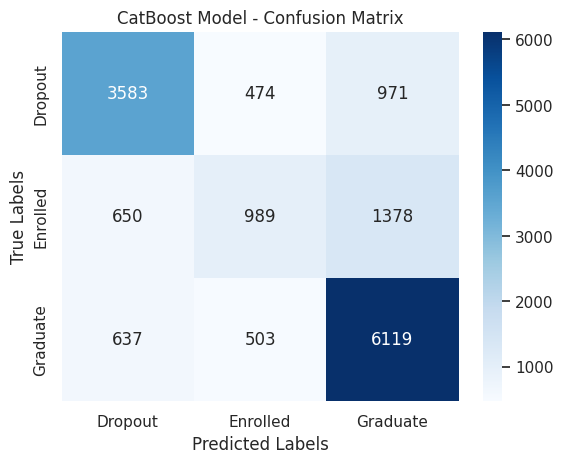

CatBoost Model Predicted Probabilities for Validation Set:
[[0.01494682 0.03972305 0.94533012]
 [0.93772661 0.02390981 0.03836359]
 [0.23144607 0.14426879 0.62428514]
 ...
 [0.24794118 0.12095866 0.63110016]
 [0.15399712 0.19434926 0.65165362]
 [0.02163106 0.048492   0.92987695]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, Pool

categorical_cols = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification","Mother's occupation", "Father's occupation", 'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder','Target']
df_train = df_train[categorical_cols]


# Assuming df_train is already defined and includes 'Target'
X = df_train.drop('Target', axis=1)
y = df_train['Target']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder to your target variable and transform it
y_encoded = label_encoder.fit_transform(y)

# Verify the mapping
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:", mapping)  # This will print: {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features (CatBoost does not require standardization but we can still do it for consistency)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

# Define the CatBoost model with basic parameters
catboost_model_cat = CatBoostClassifier(
    iterations=1500,
    learning_rate=0.05,
    depth=6,
    verbose=0,
)

# Train the CatBoost model
catboost_model_cat.fit(X_train, y_train, eval_set=(X_valid, y_valid), plot=True)

# Get the CatBoost predictions for the validation set
catboost_valid_preds = catboost_model_cat.predict(X_valid)
catboost_valid_probs = catboost_model_cat.predict_proba(X_valid)

# Decode y_valid back to original labels for classification report
y_valid_decoded = label_encoder.inverse_transform(y_valid)

# Evaluate accuracy on validation set
accuracy = accuracy_score(y_valid, catboost_valid_preds)
print(f"CatBoost Model Accuracy: {accuracy:.4f}")

# Print validation score
validation_score = catboost_model_cat.score(X_valid, y_valid)
print(f"CatBoost Model Validation Score: {validation_score:.4f}")

# Print classification report
catboost_classification_rep = classification_report(y_valid_decoded, label_encoder.inverse_transform(catboost_valid_preds), target_names=label_encoder.classes_)
print("CatBoost Model Classification Report:\n", catboost_classification_rep)

# Print confusion matrix
catboost_conf_matrix = confusion_matrix(y_valid, catboost_valid_preds)
sns.heatmap(catboost_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("CatBoost Model - Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Output the predicted probabilities for each class
print("CatBoost Model Predicted Probabilities for Validation Set:")
print(catboost_valid_probs)


Label mapping: {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CatBoost Model Accuracy: 0.7661
CatBoost Model Validation Score: 0.7661


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CatBoost Model Classification Report:
               precision    recall  f1-score   support

     Dropout       0.87      0.77      0.82      5028
    Enrolled       0.54      0.44      0.48      3017
    Graduate       0.77      0.90      0.83      7259

    accuracy                           0.77     15304
   macro avg       0.73      0.70      0.71     15304
weighted avg       0.76      0.77      0.76     15304



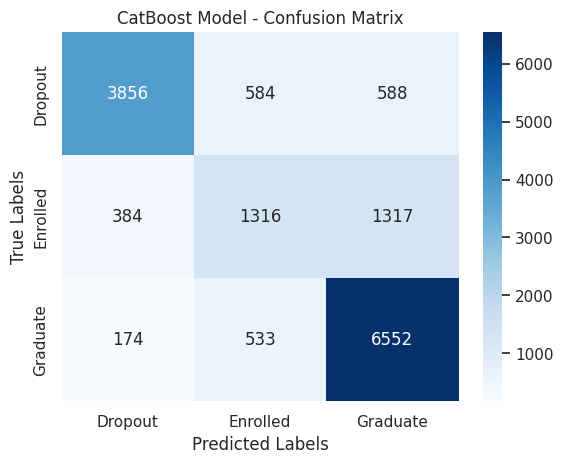

CatBoost Model Predicted Probabilities for Validation Set:
[[0.04509624 0.06929784 0.88560593]
 [0.95929914 0.03703129 0.00366957]
 [0.13760849 0.44693375 0.41545776]
 ...
 [0.04192804 0.07324739 0.88482457]
 [0.10933124 0.22315926 0.6675095 ]
 [0.20602003 0.17193955 0.62204042]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure float columns are correctly defined and included
float_cols = ['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)',
              'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']
df_train = df_train[float_cols]

# Assuming df_train is already defined and includes 'Target'
X = df_train.drop('Target', axis=1)
y = df_train['Target']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder to your target variable and transform it
y_encoded = label_encoder.fit_transform(y)

# Verify the mapping
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:", mapping)  # This will print: {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features (CatBoost does not require standardization but we can still do it for consistency)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

# Define the CatBoost model with basic parameters
catboost_model_float = CatBoostClassifier(
    iterations=1500,
    learning_rate=0.05,
    depth=6,
    verbose=0,
)

# Train the CatBoost model
catboost_model_float.fit(X_train, y_train, eval_set=(X_valid, y_valid), plot=True)

# Get the CatBoost predictions for the validation set
catboost_valid_preds = catboost_model_float.predict(X_valid)
catboost_valid_probs = catboost_model_float.predict_proba(X_valid)

# Decode y_valid back to original labels for classification report
y_valid_decoded = label_encoder.inverse_transform(y_valid)

# Evaluate accuracy on validation set
accuracy = accuracy_score(y_valid, catboost_valid_preds)
print(f"CatBoost Model Accuracy: {accuracy:.4f}")

# Print validation score
validation_score = catboost_model_float.score(X_valid, y_valid)
print(f"CatBoost Model Validation Score: {validation_score:.4f}")

# Print classification report
catboost_classification_rep = classification_report(y_valid_decoded, label_encoder.inverse_transform(catboost_valid_preds), target_names=label_encoder.classes_)
print("CatBoost Model Classification Report:\n", catboost_classification_rep)

# Print confusion matrix
catboost_conf_matrix = confusion_matrix(y_valid, catboost_valid_preds)
sns.heatmap(catboost_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("CatBoost Model - Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Output the predicted probabilities for each class
print("CatBoost Model Predicted Probabilities for Validation Set:")
print(catboost_valid_probs)

In [ ]:
integer_cols

['Age at enrollment',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Target']

Label mapping: {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
Softmax Regression Model Accuracy: 0.8014
Softmax Regression Model Classification Report:
               precision    recall  f1-score   support

     Dropout       0.88      0.79      0.84      5028
    Enrolled       0.60      0.51      0.55      3017
    Graduate       0.82      0.93      0.87      7259

    accuracy                           0.80     15304
   macro avg       0.77      0.74      0.75     15304
weighted avg       0.80      0.80      0.80     15304



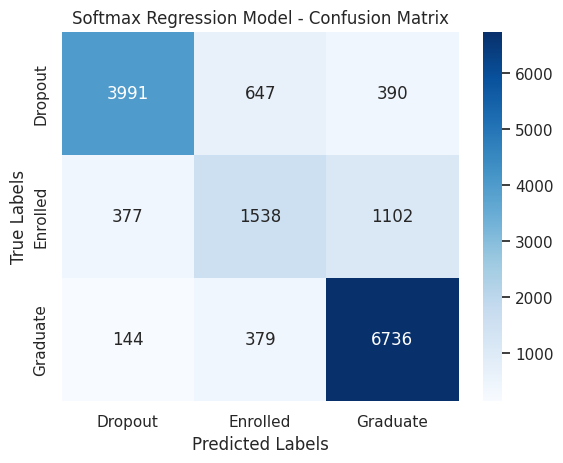

Softmax Regression Model Predicted Probabilities for Validation Set:
[[2.95393809e-02 9.21097156e-02 8.78350903e-01]
 [9.87475064e-01 1.24197839e-02 1.05151611e-04]
 [1.53829040e-01 4.78353571e-01 3.67817390e-01]
 ...
 [6.95970708e-03 3.78779739e-02 9.55162319e-01]
 [2.90600935e-02 1.37208969e-01 8.33730938e-01]
 [2.63181822e-02 1.00954707e-01 8.72727111e-01]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure float columns are correctly defined and included

df_train = df_train[integer_cols]

# Assuming df_train is already defined and includes 'Target'
X = df_train.drop('Target', axis=1)
y = df_train['Target']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder to your target variable and transform it
y_encoded = label_encoder.fit_transform(y)

# Verify the mapping
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:", mapping)  # This will print: {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

# Define the softmax regression model
softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

# Train the softmax regression model
softmax_model.fit(X_train, y_train)

# Get the softmax predictions for the validation set
softmax_valid_preds = softmax_model.predict(X_valid)
softmax_valid_probs = softmax_model.predict_proba(X_valid)

# Decode y_valid back to original labels for classification report
y_valid_decoded = label_encoder.inverse_transform(y_valid)

# Evaluate accuracy on validation set
accuracy = accuracy_score(y_valid, softmax_valid_preds)
print(f"Softmax Regression Model Accuracy: {accuracy:.4f}")

# Print classification report
softmax_classification_rep = classification_report(y_valid_decoded, label_encoder.inverse_transform(softmax_valid_preds), target_names=label_encoder.classes_)
print("Softmax Regression Model Classification Report:\n", softmax_classification_rep)

# Print confusion matrix
softmax_conf_matrix = confusion_matrix(y_valid, softmax_valid_preds)
sns.heatmap(softmax_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Softmax Regression Model - Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Output the predicted probabilities for each class
print("Softmax Regression Model Predicted Probabilities for Validation Set:")
print(softmax_valid_probs)


In [ ]:
df_test.drop(columns=['Educational special needs', 'International'], axis=1)
df_test

id  Marital status  Application mode  Application order  Course  \
0       76518               1                 1                  1    9500   
1       76519               1                 1                  1    9238   
2       76520               1                 1                  1    9238   
3       76521               1                44                  1    9147   
4       76522               1                39                  1    9670   
...       ...             ...               ...                ...     ...   
51007  127525               1                 1                  2     171   
51008  127526               2                39                  1    9119   
51009  127527               1                 1                  1     171   
51010  127528               1                 1                  3    9773   
51011  127529               1                 1                  1     171   

       Daytime/evening attendance  Previous qualification  \
0                               1                       1   
1                               1                       1   
2                               1                       1   
3                               1                      39   
4                               1                       1   
...                           ...                     ...   
51007                           1                       1   
51008                           1                      19   
51009                           1                       1   
51010                           1                       1   
51011                           1                       1   

       Previous qualification (grade)  Nacionality  Mother's qualification  \
0                               141.0            1                       3   
1                               128.0            1                       1   
2                               118.0            1                       1   
3                               130.0            1                       1   
4                               110.0            1                       1   
...                               ...          ...                     ...   
51007                           128.0            1                      38   
51008                           133.1            1                      19   
51009                           127.0            1                       1   
51010                           132.0            1                      19   
51011                           129.0            1                      37   

       ...  Curricular units 1st sem (without evaluations)  \
0      ...                                               0   
1      ...                                               0   
2      ...                                               0   
3      ...                                               0   
4      ...                                               0   
...    ...                                             ...   
51007  ...                                               0   
51008  ...                                               0   
51009  ...                                               0   
51010  ...                                               0   
51011  ...                                               0   

       Curricular units 2nd sem (credited)  \
0                                        0   
1                                        0   
2                                        0   
3                                        3   
4                                        0   
...                                    ...   
51007                                    0   
51008                                    0   
51009                                    0   
51010                                    0   
51011                                    0   

       Curricular units 2nd sem (enrolled)  \
0                                        8   
1             

In [ ]:
df_test_int = df_test[['Age at enrollment',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)']]

df_test_float = df_test[['Previous qualification (grade)',
 'Admission grade',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (grade)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']]

df_test_cat = df_test[['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Displaced',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder']]

In [ ]:
softmax_valid_probs = softmax_model.predict_proba(df_test_int)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
softmax_valid_probs = softmax_model.predict(df_test_int)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
softmax_valid_probs

array([0, 2, 2, ..., 0, 1, 0])

In [ ]:
import pandas as pd

# Assuming softmax_valid_probs is the array you want to save
# Convert the array to a DataFrame
df_probs = pd.DataFrame(softmax_valid_probs, columns=['Dropout_Prob_int', 'Enrolled_Prob_int', 'Graduate_Prob_int'])

# Save the DataFrame to a CSV file
df_probs.to_csv('/content/softmax_valid_probs_int.csv', index=False)


In [ ]:
softmax_valid_probs_float = catboost_model_float.predict_proba(df_test_float)

In [ ]:
softmax_valid_probs_float

array([[0.9112715 , 0.01877235, 0.06995614],
       [0.09940557, 0.02126467, 0.87932977],
       [0.03117618, 0.03339117, 0.93543264],
       ...,
       [0.83164634, 0.02300576, 0.14534791],
       [0.05075175, 0.03042729, 0.91882096],
       [0.87980858, 0.02500683, 0.09518458]])

In [ ]:
import pandas as pd

# Assuming softmax_valid_probs is the array you want to save
# Convert the array to a DataFrame
df_probs = pd.DataFrame(softmax_valid_probs_float, columns=['Dropout_Prob_float', 'Enrolled_Prob_float', 'Graduate_Prob_float'])

# Save the DataFrame to a CSV file
df_probs.to_csv('/content/softmax_valid_probs_float.csv', index=False)


In [ ]:
cat_pred = catboost_model_cat.predict_proba(df_test_cat)
import pandas as pd

# Assuming softmax_valid_probs is the array you want to save
# Convert the array to a DataFrame
df_probs = pd.DataFrame(cat_pred, columns=['Dropout_Prob_cat', 'Enrolled_Prob_cat', 'Graduate_Prob_cat'])

# Save the DataFrame to a CSV file
df_probs.to_csv('/content/softmax_valid_probs_cat.csv', index=False)


In [ ]:
df_int = pd.read_csv('/content/softmax_valid_probs_int.csv')
df_float = pd.read_csv('/content/softmax_valid_probs_float.csv')
df_cat = pd.read_csv('/content/softmax_valid_probs_cat.csv')

In [ ]:
# Concatenate the DataFrames column-wise
merged_df = pd.concat([df_int, df_float, df_cat], axis=1)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('/content/merged_test_probs.csv', index=False)

In [ ]:
a = pd.read_csv('/content/merged_test_probs.csv')
a

Dropout_Prob_int  Enrolled_Prob_int  Graduate_Prob_int  \
0          9.999916e-01           0.000008       1.119233e-08   
1          8.377941e-10           0.000055       9.999450e-01   
2          3.069383e-06           0.144440       8.555572e-01   
3          1.408322e-04           0.993753       6.106553e-03   
4          6.846400e-03           0.863320       1.298333e-01   
...                 ...                ...                ...   
51007      9.963058e-01           0.001288       2.405711e-03   
51008      9.999951e-01           0.000005       2.093328e-10   
51009      9.972960e-01           0.000912       1.791719e-03   
51010      9.256989e-05           0.762600       2.373078e-01   
51011      9.949520e-01           0.001819       3.228925e-03   

       Dropout_Prob_float  Enrolled_Prob_float  Graduate_Prob_float  \
0                0.911272             0.018772             0.069956   
1                0.099406             0.021265             0.879330   
2                0.031176             0.033391             0.935433   
3                0.093756             0.022523             0.883721   
4                0.050752             0.030427             0.918821   
...                   ...                  ...                  ...   
51007            0.831646             0.023006             0.145348   
51008            0.859117             0.019085             0.121798   
51009            0.831646             0.023006             0.145348   
51010            0.050752             0.030427             0.918821   
51011            0.879809             0.025007             0.095185   

       Dropout_Prob_cat  Enrolled_Prob_cat  Graduate_Prob_cat  
0              0.859416           0.029258           0.111326  
1              0.928725           0.017804           0.053471  
2              0.414388           0.120859           0.464753  
3              0.148717           0.048660           0.802623  
4              0.796198           0.028703           0.175099  
...                 ...                ...                ...  
51007          0.368089           0.095320           0.536591  
51008          0.096951           0.361498           0.541550  
51009          0.540786           0.123520           0.335694  
51010          0.919695           0.019732           0.060572  
51011          0.343037           0.224996           0.431967  

[51012 rows x 9 columns]

In [ ]:
a['Avg_Dropout'] = (a['Dropout_Prob_int'] + a['Dropout_Prob_float'] + a['Dropout_Prob_cat']) / 3
a['Avg_Enrolled'] = (a['Enrolled_Prob_int'] + a['Enrolled_Prob_float'] + a['Enrolled_Prob_cat']) / 3
a['Avg_Graduate'] = (a['Graduate_Prob_int'] + a['Graduate_Prob_float'] + a['Graduate_Prob_cat']) / 3

In [ ]:
a

Dropout_Prob_int  Enrolled_Prob_int  Graduate_Prob_int  \
0          9.999916e-01           0.000008       1.119233e-08   
1          8.377941e-10           0.000055       9.999450e-01   
2          3.069383e-06           0.144440       8.555572e-01   
3          1.408322e-04           0.993753       6.106553e-03   
4          6.846400e-03           0.863320       1.298333e-01   
...                 ...                ...                ...   
51007      9.963058e-01           0.001288       2.405711e-03   
51008      9.999951e-01           0.000005       2.093328e-10   
51009      9.972960e-01           0.000912       1.791719e-03   
51010      9.256989e-05           0.762600       2.373078e-01   
51011      9.949520e-01           0.001819       3.228925e-03   

       Dropout_Prob_float  Enrolled_Prob_float  Graduate_Prob_float  \
0                0.911272             0.018772             0.069956   
1                0.099406             0.021265             0.879330   
2                0.031176             0.033391             0.935433   
3                0.093756             0.022523             0.883721   
4                0.050752             0.030427             0.918821   
...                   ...                  ...                  ...   
51007            0.831646             0.023006             0.145348   
51008            0.859117             0.019085             0.121798   
51009            0.831646             0.023006             0.145348   
51010            0.050752             0.030427             0.918821   
51011            0.879809             0.025007             0.095185   

       Dropout_Prob_cat  Enrolled_Prob_cat  Graduate_Prob_cat  Avg_Dropout  \
0              0.859416           0.029258           0.111326     0.923560   
1              0.928725           0.017804           0.053471     0.342710   
2              0.414388           0.120859           0.464753     0.148522   
3              0.148717           0.048660           0.802623     0.080871   
4              0.796198           0.028703           0.175099     0.284599   
...                 ...                ...                ...          ...   
51007          0.368089           0.095320           0.536591     0.732014   
51008          0.096951           0.361498           0.541550     0.652021   
51009          0.540786           0.123520           0.335694     0.789909   
51010          0.919695           0.019732           0.060572     0.323513   
51011          0.343037           0.224996           0.431967     0.739266   

       Avg_Enrolled  Avg_Graduate  
0          0.016013      0.060427  
1          0.013041      0.644249  
2          0.099563      0.751914  
3          0.354978      0.564150  
4          0.307483      0.407918  
...             ...           ...  
51007      0.039871      0.228115  
51008      0.126863      0.221116  
51009      0.049146      0.160944  
51010      0.270920      0.405567  
51011      0.083941      0.176793  

[51012 rows x 12 columns]

In [ ]:
# Find the max value among 'Avg_Dropout', 'Avg_Enrolled', and 'Avg_Graduate' for each row
a['Target'] = a[['Avg_Dropout', 'Avg_Enrolled', 'Avg_Graduate']].idxmax(axis=1)

# Remove 'Avg_' prefix from the Target column
a['Target'] = a['Target'].str.replace('Avg_', '')

# Save the updated DataFrame to a new CSV file
a.to_csv('/content/updated_probs_with_target.csv', index=False)

# Display the first few rows of the DataFrame to verify the result
print(a.head())

   Dropout_Prob_int  Enrolled_Prob_int  Graduate_Prob_int  Dropout_Prob_float  \
0      9.999916e-01           0.000008       1.119233e-08            0.911272   
1      8.377941e-10           0.000055       9.999450e-01            0.099406   
2      3.069383e-06           0.144440       8.555572e-01            0.031176   
3      1.408322e-04           0.993753       6.106553e-03            0.093756   
4      6.846400e-03           0.863320       1.298333e-01            0.050752   

   Enrolled_Prob_float  Graduate_Prob_float  Dropout_Prob_cat  \
0             0.018772             0.069956          0.859416   
1             0.021265             0.879330          0.928725   
2             0.033391             0.935433          0.414388   
3             0.022523             0.883721          0.148717   
4             0.030427             0.918821          0.796198   

   Enrolled_Prob_cat  Graduate_Prob_cat  Avg_Dropout  Avg_Enrolled  \
0           0.029258           0.111326     0.923560

In [ ]:
b = pd.DataFrame({
    'id': df_test['id'],
    'Target': a['Target']
})
b

id    Target
0       76518   Dropout
1       76519  Graduate
2       76520  Graduate
3       76521  Graduate
4       76522  Graduate
...       ...       ...
51007  127525   Dropout
51008  127526   Dropout
51009  127527   Dropout
51010  127528  Graduate
51011  127529   Dropout

[51012 rows x 2 columns]

In [ ]:
b.to_csv('Submission20.csv', index = False)

## Using all CSV results to make the single submission file

In [ ]:
import pandas as pd
from collections import Counter

# List of file paths for the 9 CSV files
file_paths = [
    '/content/drive/MyDrive/submisssion files/Submission14.csv',
    '/content/drive/MyDrive/submisssion files/Submission15.csv',
    '/content/drive/MyDrive/submisssion files/Submission16.csv',
    '/content/drive/MyDrive/submisssion files/Submission17.csv',
    '/content/drive/MyDrive/submisssion files/Submission18.csv',
    '/content/drive/MyDrive/submisssion files/Submission19.csv',
    '/content/drive/MyDrive/submisssion files/Submission2.csv',
    '/content/drive/MyDrive/submisssion files/Submission6.csv',
    '/content/drive/MyDrive/submisssion files/submission8.csv'
]

# Load all CSV files into a list of DataFrames
dfs = [pd.read_csv(file_path) for file_path in file_paths]

# Extract the 'target' column from each DataFrame
target_columns = [df['Target'] for df in dfs]

# Extract the 'id' column from the first DataFrame (assuming all files have the same 'id' column)
id_column = dfs[0]['id']

# Combine the target columns into a single DataFrame
combined_targets = pd.concat(target_columns, axis=1)

# Function to find the most common prediction in each row
def most_common_prediction(row):
    return Counter(row).most_common(1)[0][0]

# Apply the function to each row to create the 'final_target' column
combined_targets['final_target'] = combined_targets.apply(most_common_prediction, axis=1)

# Combine the 'id' column with the 'final_target' column
final_df = pd.DataFrame({
    'id': id_column,
    'final_target': combined_targets['final_target']
})

# Save the combined DataFrame with the final target to a new CSV file
output_file_path = 'final_predictions_with_id.csv'
final_df.to_csv(output_file_path, index=False)

# Display the first few rows of the combined DataFrame to verify the result
print(final_df.head())


      id final_target
0  76518      Dropout
1  76519     Graduate
2  76520     Graduate
3  76521     Graduate
4  76522     Enrolled


In [ ]:
# Assuming model is already trained and df_test contains your test data

# Make predictions
predictions = model.predict(df_test)

# Define the mapping dictionary
label_mapping_reverse = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}

# Map integer predictions to class names
predicted_labels = [label_mapping_reverse[pred] for pred in predictions]

# Print or use the predicted labels as needed
print("Predicted Labels:")
print(predicted_labels)


Predicted Labels:
['Dropout', 'Graduate', 'Graduate', 'Graduate', 'Enrolled', 'Graduate', 'Graduate', 'Graduate', 'Dropout', 'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Enrolled', 'Dropout', 'Enrolled', 'Graduate', 'Graduate', 'Enrolled', 'Graduate', 'Graduate', 'Dropout', 'Graduate', 'Enrolled', 'Dropout', 'Dropout', 'Dropout', 'Graduate', 'Graduate', 'Enrolled', 'Graduate', 'Graduate', 'Dropout', 'Enrolled', 'Graduate', 'Dropout', 'Dropout', 'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Enrolled', 'Graduate', 'Dropout', 'Dropout', 'Enrolled', 'Graduate', 'Graduate', 'Graduate', 'Dropout', 'Dropout', 'Graduate', 'Enrolled', 'Enrolled', 'Enrolled', 'Graduate', 'Graduate', 'Enrolled', 'Graduate', 'Dropout', 'Graduate', 'Dropout', 'Graduate', 'Enrolled', 'Dropout', 'Graduate', 'Enrolled', 'Enrolled', 'Graduate', 'Graduate', 'Graduate', 'Dropout', 'Enrolled', 'Graduate', 'Graduate', 'Enrolled', 'Dropout', 'Dropout', 'Graduate', 'Graduate', 'Drop

In [ ]:
a = pd.DataFrame({
    'id': df_test['id'],
    'Target': predicted_labels
})
a.to_csv('Submission19.csv', index = False)

In [ ]:
a

id    Target
0       76518   Dropout
1       76519  Graduate
2       76520  Graduate
3       76521  Graduate
4       76522  Enrolled
...       ...       ...
51007  127525   Dropout
51008  127526   Dropout
51009  127527   Dropout
51010  127528   Dropout
51011  127529   Dropout

[51012 rows x 2 columns]

## LGBM CLassifier with hyper parameter

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import StratifiedKFold
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.metrics import accuracy_score, classification_report
# import lightgbm as lgb

# # Assuming df_train is already defined and includes 'Target'
# X = df_train.drop('Target', axis=1)
# y = df_train['Target']

# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# # Fit the LabelEncoder to your target variable and transform it
# y_encoded = label_encoder.fit_transform(y)

# # Verify the mapping
# mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
# print("Label mapping:", mapping)  # This will print: {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}

# # Standardize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Define the LGBMClassifier parameters
# lgb_params = {
#     'n_estimators': 8000,
#     'objective': 'multiclass',
#     'num_class': 3,
#     'boosting_type': 'gbdt',
#     'metric': 'multi_logloss',
#     'verbosity': -1,
#     'random_state': 99,
#     'reg_alpha': 1.7878527151970849,
#     'reg_lambda': 1.391543710164331,
#     'colsample_bytree': 0.5,
#     'subsample': 0.5,
#     'learning_rate': 0.04,
#     'max_depth': 20,
#     'num_leaves': 70,
#     'min_child_samples': 40,
#     'min_data_per_groups': 16
# }

# # Initialize the StratifiedKFold
# kf = StratifiedKFold(n_splits=8, shuffle=True, random_state=99)

# # Placeholder for storing results
# oof_preds = np.zeros((X_scaled.shape[0], 3))
# final_preds = np.zeros((X_scaled.shape[0], 3))

# # Perform 8-fold cross-validation
# for fold, (train_idx, valid_idx) in enumerate(kf.split(X_scaled, y_encoded)):
#     print(f'Fold {fold + 1}')
#     X_train, X_valid = X_scaled[train_idx], X_scaled[valid_idx]
#     y_train, y_valid = y_encoded[train_idx], y_encoded[valid_idx]

#     # Create LightGBM model
#     lgb_model = lgb.LGBMClassifier(**lgb_params)

#     # Train the model
#     lgb_model.fit(
#         X_train,
#         y_train,
#         eval_set=[(X_valid, y_valid)],
#         eval_metric='multi_logloss',
#         early_stopping_rounds=100,
#         verbose=100
#     )

#     # Predict validation set
#     valid_preds = lgb_model.predict_proba(X_valid)
#     oof_preds[valid_idx] = valid_preds

#     # Calculate accuracy
#     valid_preds_labels = np.argmax(valid_preds, axis=1)
#     accuracy = accuracy_score(y_valid, valid_preds_labels)
#     print(f'Fold {fold + 1} Accuracy: {accuracy:.4f}')

#     # Aggregate final predictions
#     final_preds += lgb_model.predict_proba(X_scaled)

# # Average the final predictions
# final_preds /= kf.n_splits

# # Convert predictions to labels
# final_preds_labels = np.argmax(final_preds, axis=1)

# # Decode y_encoded back to original labels for classification report
# y_decoded = label_encoder.inverse_transform(y_encoded)
# final_preds_decoded = label_encoder.inverse_transform(final_preds_labels)

# # Print overall accuracy
# overall_accuracy = accuracy_score(y_encoded, final_preds_labels)
# print(f'Overall Accuracy: {overall_accuracy:.4f}')

# # Print classification report
# classification_rep = classification_report(y_decoded, final_preds_decoded, target_names=label_encoder.classes_)
# print("Overall Classification Report:\n", classification_rep)


In [ ]:
import pandas as pd

# Load the CSV file
csv_file_path = '/content/drive/MyDrive/submission 23.csv'  # replace with your CSV file path
df = pd.read_csv(csv_file_path)

# Check the class distribution
class_counts = df['Target'].value_counts()
total_count = len(df)

# Calculate percentages
class_percentages = (class_counts / total_count) * 100

# Print the results
for class_label, percentage in class_percentages.items():
    print(f'{class_label}: {percentage:.2f}%')


Graduate: 51.51%
Dropout: 30.25%
Enrolled: 18.23%


In [ ]:

prediction = model.predict(df_test)
prediction

array([0, 2, 2, ..., 0, 0, 0])

In [ ]:
predictions_decoded = label_encoder.inverse_transform(predictions)

print(predictions_decoded)

['Graduate' 'Dropout' 'Graduate' ... 'Graduate' 'Graduate' 'Graduate']


In [ ]:
prediction = best_model.predict(df_test)
prediction

array([['Dropout'],
       ['Graduate'],
       ['Graduate'],
       ...,
       ['Dropout'],
       ['Dropout'],
       ['Dropout']], dtype=object)

In [ ]:
prediction = prediction.reshape(-1)
prediction


array(['Dropout', 'Graduate', 'Graduate', ..., 'Dropout', 'Dropout',
       'Dropout'], dtype=object)

In [ ]:
a = pd.DataFrame({
    'id': df_test['id'],
    'Target': prediction
})

In [ ]:
a.to_csv('Submission16.csv', index = False)

In [ ]:
a

id    Target
0       76518   Dropout
1       76519  Graduate
2       76520  Graduate
3       76521  Graduate
4       76522  Enrolled
...       ...       ...
51007  127525   Dropout
51008  127526   Dropout
51009  127527   Dropout
51010  127528   Dropout
51011  127529   Dropout

[51012 rows x 2 columns]

In [ ]:
a.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51012 entries, 0 to 51011
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      51012 non-null  int64 
 1   Target  51012 non-null  object
dtypes: int64(1), object(1)
memory usage: 797.2+ KB


# Using Parameter Grid

In [ ]:
# Assuming df_train is already defined
X = df_train[['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)',
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'IR_zscore', 'GDP_zscore']]
y = df_train['Target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128]
}

# Initialize the CatBoost classifier
catboost_model = CatBoostClassifier(silent=True)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# # Predict on test set using the best parameters
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print('Accuracy:', accuracy)

# # Generate classification report
# print('Classification Report:\n', classification_report(y_test, y_pred))

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters: {'border_count': 128, 'depth': 6, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Best Score: 0.8289934013319735


In [ ]:
X.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Mother's qualification',
       'Father's qualification', 'Mother's occupation', 'Father's occupation',
       'Admission grade', 'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
   

# Feature Engineering

In [ ]:
# Function to apply z-score transformation
def z_score_transformation(column):
    mean = column.mean()
    std = column.std()
    return (column - mean) / std

# Apply z-score transformation to a specific column
df_train['GDP_zscore'] = z_score_transformation(df_train['GDP'])


In [ ]:
df_test = df_test.drop(columns=['GDP'],axis =1)

In [ ]:
# Function to apply z-score transformation
def z_score_transformation(column):
    mean = column.mean()
    std = column.std()
    return (column - mean) / std

# Apply z-score transformation to a specific column
df_test['IR_zscore'] = z_score_transformation(df_test['Inflation rate'])
df_test = df_test.drop(columns=['Inflation rate'],axis =1)

In [ ]:
df_test = df_test.drop(columns = ['Nacionality'], axis =1)

In [ ]:
prediction = catboost_model.predict(df_test)
prediction

array([['Dropout'],
       ['Graduate'],
       ['Graduate'],
       ...,
       ['Dropout'],
       ['Dropout'],
       ['Dropout']], dtype=object)

In [ ]:
prediction = prediction.reshape(-1)
prediction

array(['Dropout', 'Graduate', 'Graduate', ..., 'Dropout', 'Dropout',
       'Dropout'], dtype=object)

In [ ]:
a = pd.DataFrame({
    'id': df_test['id'],
    'Target': prediction
})

In [ ]:
a.to_csv('Submission7.csv', index = False)

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51012 entries, 0 to 51011
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      51012 non-null  int64 
 1   Target  51012 non-null  object
dtypes: int64(1), object(1)
memory usage: 797.2+ KB


In [ ]:
df_train.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Mother's qualification',
       'Father's qualification', 'Mother's occupation', 'Father's occupation',
       'Admission grade', 'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'C

In [ ]:
df_train['Curricular units 1st sem (approved)'].describe()

count    76358.000000
mean         4.179248
std          2.685899
min          0.000000
25%          2.000000
50%          5.000000
75%          6.000000
max         26.000000
Name: Curricular units 1st sem (approved), dtype: float64

In [ ]:
df_train['Total Credits_1stSem'] = (
    df_train['Curricular units 1st sem (credited)'] +
    df_train['Curricular units 1st sem (enrolled)'] +
    df_train['Curricular units 1st sem (evaluations)'] +
    df_train['Curricular units 1st sem (approved)']
)

In [ ]:
df_train['Total Credits_2ndSem'] = (
    df_train['Curricular units 2nd sem (credited)'] +
    df_train['Curricular units 2nd sem (enrolled)'] +
    df_train['Curricular units 2nd sem (evaluations)'] +
    df_train['Curricular units 2nd sem (approved)']
)

In [ ]:
df_train = df_train.drop(columns=['Total Credits_1stSem'],axis =1)

In [ ]:
df_train = df_train.drop(columns=['Total Credits_2ndSem'],axis =1)

In [ ]:
df['GDP'].describe()

count    76518.000000
mean        -0.080921
std          2.251382
min         -4.060000
25%         -1.700000
50%          0.320000
75%          1.790000
max          3.510000
Name: GDP, dtype: float64

In [ ]:
df['Inflation rate'].describe()

count    76518.000000
mean         1.228218
std          1.398816
min         -0.800000
25%          0.300000
50%          1.400000
75%          2.600000
max          3.700000
Name: Inflation rate, dtype: float64

In [ ]:
# Function to apply z-score transformation
def z_score_transformation(column):
    mean = column.mean()
    std = column.std()
    return (column - mean) / std

# Apply z-score transformation to a specific column
df_train['GDP_zscore'] = z_score_transformation(df_train['GDP'])


In [ ]:
df_train = df_train.drop(columns=['GDP'],axis =1)

In [ ]:
# Function to apply z-score transformation
def z_score_transformation(column):
    mean = column.mean()
    std = column.std()
    return (column - mean) / std

# Apply z-score transformation to a specific column
df_train['IR_zscore'] = z_score_transformation(df_train['Inflation rate'])
df_train = df_train.drop(columns=['Inflation rate'],axis =1)

# Selected models Testing

In [ ]:

# # Assuming df is your dataframe and 'target' is the name of your target column
# X = df_train.drop('Target', axis=1)
# y = df_train['Target']

# # Split the data into training and testing sets
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define multiple Logistic Regression models
# models = [
#     ('lr1', LogisticRegression(max_iter=1000, solver='liblinear')),
#     ('lr2', LogisticRegression(max_iter=1000, solver='saga')),
#     ('lr3', LogisticRegression(max_iter=1000, solver='lbfgs')),
#     ('lr4', LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')),
#     ('lr5', LogisticRegression(max_iter=1000, penalty='l2', solver='lbfgs'))
# ]

# # Create the Voting Classifier
# voting_clf1 = VotingClassifier(estimators=models, voting='soft')

# # Train the model
# voting_clf1.fit(X, y)

# # Evaluate the model
# # y_pred = voting_clf.predict(X_test)
# # print('Accuracy:', accuracy_score(y_test, y_pred))
# # print('Classification Report:\n', classification_report(y_test, y_pred))


In [ ]:
# pred = voting_clf1.predict(df_test)

In [ ]:
# a = pd.DataFrame({
#     'id': df_test['id'],
#     'pred_logReg': pred
# })

In [ ]:
# a

## Logisgtic Regression with Hard voting

In [ ]:


# # Assuming df is your dataframe and 'target' is the name of your target column
# X = df_train.drop('Target', axis=1)
# y = df_train['Target']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define multiple Logistic Regression models
# models = [
#     ('lr1', LogisticRegression(max_iter=1000, solver='liblinear')),
#     ('lr2', LogisticRegression(max_iter=1000, solver='saga')),
#     ('lr3', LogisticRegression(max_iter=1000, solver='lbfgs')),
#     ('lr4', LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')),
#     ('lr5', LogisticRegression(max_iter=1000, penalty='l2', solver='lbfgs'))
# ]

# # Create the Voting Classifier
# voting_clf = VotingClassifier(estimators=models, voting='hard')

# # Train the model
# voting_clf.fit(X_train, y_train)

# # Evaluate the model
# y_pred = voting_clf.predict(X_test)
# print('Accuracy:', accuracy_score(y_test, y_pred))
# print('Classification Report:\n', classification_report(y_test, y_pred))

## Dcision Tree with soft voting

In [ ]:
# # Assuming df is your dataframe and 'target' is the name of your target column
# X = df_train.drop('Target', axis=1)
# y = df['Target']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define multiple Decision Tree models
# models = [
#     ('dt1', DecisionTreeClassifier(max_depth=3)),
#     ('dt2', DecisionTreeClassifier(max_depth=5)),
#     ('dt3', DecisionTreeClassifier(max_depth=7)),
#     ('dt4', DecisionTreeClassifier(min_samples_split=4)),
#     ('dt5', DecisionTreeClassifier(min_samples_split=6))
# ]

# # Create the Voting Classifier
# voting_clf = VotingClassifier(estimators=models, voting='soft')

# # Train the model
# voting_clf.fit(X_train, y_train)

# # Evaluate the model
# y_pred = voting_clf.predict(X_test)
# print('Accuracy:', accuracy_score(y_test, y_pred))
# print('Classification Report:\n', classification_report(y_test, y_pred))

## Decision Tree Classifier with hard voting

In [ ]:
# # Assuming df is your dataframe and 'target' is the name of your target column
# X = df_train.drop('Target', axis=1)
# y = df['Target']

# # Split the data into training and testing sets
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define multiple Decision Tree models
# models = [
#     ('dt1', DecisionTreeClassifier(max_depth=3)),
#     ('dt2', DecisionTreeClassifier(max_depth=5)),
#     ('dt3', DecisionTreeClassifier(max_depth=7)),
#     ('dt4', DecisionTreeClassifier(min_samples_split=4)),
#     ('dt5', DecisionTreeClassifier(min_samples_split=6))
# ]

# # Create the Voting Classifier
# voting_clf2 = VotingClassifier(estimators=models, voting='hard')

# # Train the model
# voting_clf2.fit(X, y)

# # Evaluate the model
# # y_pred = voting_clf.predict(X_test)
# # print('Accuracy:', accuracy_score(y_test, y_pred))
# # print('Classification Report:\n', classification_report(y_test, y_pred))

In [ ]:
# pred2 = voting_clf2.predict(df_test)

In [ ]:
# a['pred_decisionTree'] = pred2

In [ ]:
# a

## Random Forest Classifier

In [ ]:
# # Assuming df is your dataframe and 'target' is the name of your target column
# X = df_train.drop('Target', axis=1)
# y = df['Target']

# # Split the data into training and testing sets
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define multiple Random Forest models
# models = [
#     ('rf1', RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)),
#     ('rf2', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)),
#     ('rf3', RandomForestClassifier(n_estimators=200, max_depth=3, random_state=42)),
#     ('rf4', RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)),
#     ('rf5', RandomForestClassifier(n_estimators=300, max_depth=7, random_state=42))
# ]

# # Create the Voting Classifier
# voting_clf3 = VotingClassifier(estimators=models, voting='soft')

# # Train the model
# voting_clf3.fit(X, y)

# # Evaluate the model
# # y_pred = voting_clf.predict(X_test)
# # print('Accuracy:', accuracy_score(y_test, y_pred))
# # print('Classification Report:\n', classification_report(y_test, y_pred))

In [ ]:
# pred3 = voting_clf3.predict(df_test)

In [ ]:
# a['pred_RandomForest'] = pred3

In [ ]:
# a

## Gradient Boosting Classifier

In [ ]:
# Assuming df is your dataframe and 'target' is the name of your target column
X = df_train.drop('Target', axis=1)
y = df_train['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define multiple GBM models
# models = [
#     ('gbm1', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
#     ('gbm2', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)),
#     ('gbm3', GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)),
#     ('gbm4', GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)),
#     ('gbm5', GradientBoostingClassifier(n_estimators=300, learning_rate=0.01, max_depth=3, random_state=42))
# ]

# Create the Voting Classifier
Gradient = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
Gradient.fit(X_train, y_train)

# Evaluate the model
y_pred = Gradient.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8342263460533194
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.90      0.84      0.87      5028
    Enrolled       0.66      0.62      0.64      3017
    Graduate       0.86      0.92      0.89      7259

    accuracy                           0.83     15304
   macro avg       0.81      0.79      0.80     15304
weighted avg       0.83      0.83      0.83     15304



In [ ]:
predgb = Gradient.predict(df_test)

In [ ]:
predgb

array(['Dropout', 'Graduate', 'Graduate', ..., 'Dropout', 'Dropout',
       'Dropout'], dtype=object)

In [ ]:
h = pd.DataFrame({
    'id': df_test['id'],
    'Target': predgb
})
h.to_csv('/content/Submission4.csv' , index = False)

In [ ]:
h

id    Target
0       76518   Dropout
1       76519  Graduate
2       76520  Graduate
3       76521  Graduate
4       76522  Enrolled
...       ...       ...
51007  127525   Dropout
51008  127526   Dropout
51009  127527   Dropout
51010  127528   Dropout
51011  127529   Dropout

[51012 rows x 2 columns]

## Gradiant Boosting with hard voting

In [ ]:
# # Assuming df is your dataframe and 'target' is the name of your target column
# X = df_train.drop('Target', axis=1)
# y = df_train['Target']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define multiple GBM models
# models = [
#     ('gbm1', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
#     ('gbm2', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)),
#     ('gbm3', GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)),
#     ('gbm4', GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)),
#     ('gbm5', GradientBoostingClassifier(n_estimators=300, learning_rate=0.01, max_depth=3, random_state=42))
# ]

# # Create the Voting Classifier
# voting_clf = VotingClassifier(estimators=models, voting='hard')

# # Train the model
# voting_clf.fit(X_train, y_train)

# # Evaluate the model
# y_pred = voting_clf.predict(X_test)
# print('Accuracy:', accuracy_score(y_test, y_pred))
# print('Classification Report:\n', classification_report(y_test, y_pred))

In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column
df_train['Target'] = label_encoder.fit_transform(df_train['Target'])

print(df_train)

          id  Marital status  Application mode  Application order  Course  \
0          0               1                 1                  1    9238   
1          1               1                17                  1    9238   
2          2               1                17                  2    9254   
3          3               1                 1                  3    9500   
4          4               1                 1                  2    9500   
...      ...             ...               ...                ...     ...   
76513  76513               1                17                  1    9254   
76514  76514               1                 1                  6    9254   
76515  76515               5                17                  1    9085   
76516  76516               1                 1                  3    9070   
76517  76517               1                 1                  1    9773   

       Daytime/evening attendance  Previous qualification  \
0             

## XGB Classifier

In [ ]:
# Assuming df is your dataframe and 'target' is the name of your target column

X = df_train.drop('Target', axis=1)
y = df_train['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define multiple XGBoost models
# models = [
#     ('xgb1', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='mlogloss')),
#     ('xgb2', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, use_label_encoder=False, eval_metric='mlogloss')),
#     ('xgb3', XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, use_label_encoder=False, eval_metric='mlogloss')),
#     ('xgb4', XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, use_label_encoder=False, eval_metric='mlogloss')),
#     ('xgb5', XGBClassifier(n_estimators=300, learning_rate=0.01, max_depth=3, use_label_encoder=False, eval_metric='mlogloss'))
# ]

# Create the Voting Classifier
XGBC = XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='mlogloss')

# Train the model
XGBC.fit(X_train, y_train)

# Evaluate the model
y_pred = XGBC.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8339649764767381
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87      5028
           1       0.66      0.62      0.64      3017
           2       0.86      0.92      0.89      7259

    accuracy                           0.83     15304
   macro avg       0.81      0.79      0.80     15304
weighted avg       0.83      0.83      0.83     15304



In [ ]:
# a['pred_XGBclassifier'] = pred5
# a

## XGB Classifier with  hard voting

In [ ]:
# # Assuming df is your dataframe and 'target' is the name of your target column

# X = df_train.drop('Target', axis=1)
# y = df_train['Target']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define multiple XGBoost models
# models = [
#     ('xgb1', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='mlogloss')),
#     ('xgb2', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, use_label_encoder=False, eval_metric='mlogloss')),
#     ('xgb3', XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, use_label_encoder=False, eval_metric='mlogloss')),
#     ('xgb4', XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, use_label_encoder=False, eval_metric='mlogloss')),
#     ('xgb5', XGBClassifier(n_estimators=300, learning_rate=0.01, max_depth=3, use_label_encoder=False, eval_metric='mlogloss'))
# ]

# # Create the Voting Classifier
# voting_clf = VotingClassifier(estimators=models, voting='hard')

# # Train the model
# voting_clf.fit(X_train, y_train)

# # Evaluate the model
# y_pred = voting_clf.predict(X_test)
# print('Accuracy:', accuracy_score(y_test, y_pred))
# print('Classification Report:\n', classification_report(y_test, y_pred))

## LGBM Classifier

In [ ]:

# # Assuming df is your dataframe and 'target' is the name of your target column

# X = df_train.drop('Target', axis=1)
# y = df_train['Target']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define multiple LightGBM models
# # models = [
# #     ('lgbm1', LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
# #     ('lgbm2', LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)),
# #     ('lgbm3', LGBMClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)),
# #     ('lgbm4', LGBMClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)),
# #     ('lgbm5', LGBMClassifier(n_estimators=300, learning_rate=0.01, max_depth=3, random_state=42))
# # ]

# # Create the Voting Classifier
# LGBM = LGBMClassifier(n_estimators=1000, learning_rate=0.1, max_depth=6, random_state=42)

# # Train the model
# LGBM.fit(X_train, y_train)

# # Evaluate the model
# y_pred = LGBM.predict(X_test)
# print('Accuracy:', accuracy_score(y_test, y_pred))
# print('Classification Report:\n', classification_report(y_test, y_pred))

In [ ]:
# pred6 = voting_clf6.predict(df_test)
# pred6

In [ ]:
# a['pred_LightGBM'] = pred6
# a

In [ ]:

# # Assuming df is your dataframe and 'target' is the name of your target column

# X = df_train.drop('Target', axis=1)
# y = df_train['Target'],l

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define multiple LightGBM models
# models = [
#     ('lgbm1', LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
#     ('lgbm2', LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)),
#     ('lgbm3', LGBMClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)),
#     ('lgbm4', LGBMClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)),
#     ('lgbm5', LGBMClassifier(n_estimators=300, learning_rate=0.01, max_depth=3, random_state=42))
# ]

# # Create the Voting Classifier
# voting_clf = VotingClassifier(estimators=models, voting='hard')

# # Train the model
# voting_clf.fit(X_train, y_train)

# # Evaluate the model
# y_pred = voting_clf.predict(X_test)
# print('Accuracy:', accuracy_score(y_test, y_pred))
# print('Classification Report:\n', classification_report(y_test, y_pred))

In [ ]:
df_train.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

In [ ]:
# Assuming df is your dataframe and 'target' is the name of your target column
X = df_train.drop('Target', axis=1)
y = df_train['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


catboost = CatBoostClassifier(border_count = 128, depth = 6, iterations = 1000, l2_leaf_reg = 1, learning_rate = 0.1)

# Train the model
catboost.fit(X_train, y_train)

# Evaluate the model
y_pred = catboost.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

0:	learn: 0.9919510	total: 43.8ms	remaining: 43.8s
1:	learn: 0.9099961	total: 90.5ms	remaining: 45.1s
2:	learn: 0.8452604	total: 136ms	remaining: 45.4s
3:	learn: 0.7936394	total: 182ms	remaining: 45.2s
4:	learn: 0.7521953	total: 232ms	remaining: 46.1s
5:	learn: 0.7164947	total: 296ms	remaining: 49s
6:	learn: 0.6855565	total: 344ms	remaining: 48.8s
7:	learn: 0.6592216	total: 393ms	remaining: 48.7s
8:	learn: 0.6362071	total: 442ms	remaining: 48.6s
9:	learn: 0.6173331	total: 489ms	remaining: 48.4s
10:	learn: 0.6006399	total: 537ms	remaining: 48.3s
11:	learn: 0.5852364	total: 583ms	remaining: 48s
12:	learn: 0.5724544	total: 637ms	remaining: 48.4s
13:	learn: 0.5613140	total: 681ms	remaining: 48s
14:	learn: 0.5509375	total: 732ms	remaining: 48s
15:	learn: 0.5421199	total: 781ms	remaining: 48s
16:	learn: 0.5340205	total: 831ms	remaining: 48s
17:	learn: 0.5269186	total: 878ms	remaining: 47.9s
18:	learn: 0.5210724	total: 927ms	remaining: 47.9s
19:	learn: 0.5154386	total: 974ms	remaining: 47.7s


In [ ]:
# df_test.drop(columns = ['nat'])

In [ ]:
prediction = catboost.predict(df_test)
prediction

array([['Dropout'],
       ['Graduate'],
       ['Graduate'],
       ...,
       ['Dropout'],
       ['Dropout'],
       ['Dropout']], dtype=object)

In [ ]:
prediction = prediction.reshape(-1)
prediction

array(['Dropout', 'Graduate', 'Graduate', ..., 'Dropout', 'Dropout',
       'Dropout'], dtype=object)

In [ ]:
df_train

Marital status  Application mode  Application order  Course  \
0                   1                 1                  1    9238   
1                   1                17                  1    9238   
2                   1                17                  2    9254   
3                   1                 1                  3    9500   
4                   1                 1                  2    9500   
...               ...               ...                ...     ...   
76513               1                17                  1    9254   
76514               1                 1                  6    9254   
76515               5                17                  1    9085   
76516               1                 1                  3    9070   
76517               1                 1                  1    9773   

       Daytime/evening attendance  Previous qualification  \
0                               1                       1   
1                               1                       1   
2                               1                       1   
3                               1                       1   
4                               1                       1   
...                           ...                     ...   
76513                           1                       1   
76514                           1                       1   
76515                           1                       1   
76516                           1                       1   
76517                           1                       1   

       Previous qualification (grade)  Mother's qualification  \
0                               126.0                       1   
1                               125.0                      19   
2                               137.0                       3   
3                               131.0                      19   
4                               132.0                      19   
...                               ...                     ...   
76513                           121.0                      19   
76514                           125.0                       1   
76515                           138.0                      37   
76516                           136.0                      38   
76517                           133.1                      19   

       Father's qualification  Mother's occupation  ...  \
0                          19                    5  ...   
1                          19                    9  ...   
2                          19                    2  ...   
3                           3                    3  ...   
4                          37                    4  ...   
...                       ...                  ...  ...   
76513                       1                    7  ...   
76514                      38                    4  ...   
76515                      37                    9  ...   
76516                      37                    5  ...   
76517                      19                    4  ...   

       Curricular units 2nd sem (credited)  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
...                                    ...   
76513                                    0   
76514                                    0   
76515                                    0   
76516                                    0   
76517                                    0   

       Curricular units 2nd sem (enrolled)  \
0                                        6   
1                                        6   
2                                        6   
3                                        8   
4                                        7   
...                                    ...   
76513                                    6   
76514                 

In [ ]:
a = pd.DataFrame({
    'id': df_test['id'],
    'Target': prediction
})
a.to_csv('/content/Submission6.csv' , index = False)

In [ ]:
a

id    Target
0       76518   Dropout
1       76519  Graduate
2       76520  Graduate
3       76521  Graduate
4       76522  Enrolled
...       ...       ...
51007  127525   Dropout
51008  127526   Dropout
51009  127527   Dropout
51010  127528   Dropout
51011  127529   Dropout

[51012 rows x 2 columns]

In [ ]:
pred7 = voting_clf7.predict(df_test)
pred7

In [ ]:
a['pred_Catboost'] = pred7
a

SVM

In [ ]:
# # Assuming df is your dataframe and 'target' is the name of your target column
# X = df_train.drop('Target', axis=1)
# y = df_train['Target']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define multiple SVM models

# models = [
#     ('svm1', SVC(kernel='linear', C=1, probability=True, random_state=42)),
#     ('svm2', SVC(kernel='poly', degree=3, C=1, probability=True, random_state=42)),
#     ('svm3', SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=42)),
#     ('svm4', SVC(kernel='sigmoid', C=1, probability=True, random_state=42)),
#     ('svm5', SVC(kernel='rbf', C=1, gamma=0.01, probability=True, random_state=42))
# ]

# # Create the Voting Classifier
# voting_clf = VotingClassifier(estimators=models, voting='soft')

# # Train the model
# voting_clf.fit(X_train, y_train)

# # Evaluate the model
# y_pred = voting_clf.predict(X_test)
# print('Accuracy:', accuracy_score(y_test, y_pred))
# print('Classification Report:\n', classification_report(y_test, y_pred))

## Voting of all algorithms

In [ ]:
# Function to find the value with the maximum count in a row
def find_max_vote(row):
    return row.value_counts().idxmax()

# Apply the function to each row and create a new column 'vote_winner'
a['Target'] = a.apply(find_max_vote, axis=1)

a

In [ ]:
# b = a[['id', 'Target']]
# b

In [ ]:
# b.to_csv('/content/submission.csv', index=False)

In [ ]:
# Create the VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('catboost', catboost),
        ('gradientboosting', Gradient),
        ('xgb', XGBC)
    ],
    voting='soft'  # You can use 'hard' for majority voting or 'soft' for weighted probabilities
)

# Fit the VotingClassifier
voting_clf.fit(X_train, y_train)

# Evaluate the model

y_pred = voting_clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

In [ ]:
pred7 = voting_clf.predict(df_test)
pred7

In [ ]:
a = pd.DataFrame({
    'id': df_test['id'],
    'Target': pred7
})


In [ ]:
a

In [ ]:

# Create the mapping dictionary
mapping_dict = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}

# Map the encoded values back to original categories
a['Target'] = a['Target'].map(mapping_dict)

print("\nDataFrame with original target values restored using map:")
print(a)

In [ ]:
a.to_csv('/content/submission3.csv', index=False)